# Analyze the US Distribution of Wealth, economic and social gaps by State



You are working as a Research Analyst at a renowned consultancy. After working on a previous project and identifying the US as an ideal country for investment, it’s time to dig deeper into the numbers. <br>
The main objective is to create a development impact assessment. <br>
In order to achieve sustainability goals, it’s important to choose sites with the right population, education, infrastructure, purchasing power and diversification.

You will first need to choose significant variables through visualization, factorial analysis, group similar variables together and finally create clusters of states with similar characteristics.

Perform your analysis in the following order:

> 1) **Exploratory Data Analysis** <br>
> 2) **Statistics and Probability**<br>
> 3) **Machine Learning**<br>


Your analysis will help rank states by multiple factors to show which would benefit from which projects and what they can become like after such projects are implemented.

In [78]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import altair as alt
sns.set()

#import data
data = pd.read_excel("US State Data.xlsx")

# import altair as alt (Graphs look better in quality than matplotlib)

## **Get to know the Data**
Transform all data into a cross sectional format as follows (Each variable vertically has 50 observations for all states)

In [79]:
df = pd.read_excel("US State Data Transformed.xlsx")
# Remove 0-based index and start with 1 instead
df.index = df.index + 1
# Replace all missing values / NaNs with zeros in entire DataFrame
df.fillna(0, inplace=True)
df.head(10)

,State,Total Population 2021,Population Growth or Decline 2010 to 2021,Households 2020,Labor Force (persons) Ann. Avg. 2021,Unemployment Rate Ann. Avg. 2021,Per Capita Personal Income 2021,Median Household Income 2020,Poverty Rate 2020,High School Diploma or More - Pct. of Adults 25+ 2020,...,Unemployment Rate 5-Year Pct. Chg,Unemployment Rate 10-Year Pct. Chg,Total Population 25 and Older,Less than 9th Grade,"9th to 12th, No Diploma",High School Graduate (includes equiv.),"Some College, No Degree",Associate Degree,Bachelor's Degree,"Graduate, Professional or Doctorate Degree"
1,Alabama,5039877,0.054,1888504,0.0,0.0,49769,53958,14.9,0.869,...,0.000,0.000,3344006,133650,305297,1014342,721609,292064,546674,330370
2,Alaska,732673,0.032,255173,0.0,0.0,65813,79961,9.6,0.931,...,0.000,0.000,483436,11513,21663,137486,125645,42162,90161,54806
3,Arizona,7276316,0.138,2643430,0.0,0.0,55487,64652,12.8,0.879,...,0.000,0.000,4846056,248570,339349,1151988,1208298,429153,911228,557470
4,Arkansas,3025891,0.038,1170544,0.0,0.0,50625,51146,15.2,0.872,...,0.000,0.000,2026722,95403,164957,686812,445268,151587,308648,174047
5,California,39237836,0.053,13103114,0.0,0.0,76614,83001,11.5,0.839,...,0.000,0.000,26665143,2367996,1918542,5431385,5566520,2123827,5764827,3492046
6,Colorado,5812069,0.156,2137402,0.0,0.0,70706,77688,9.0,0.921,...,0.000,0.000,3900754,128623,180162,827081,809908,332127,1015989,606864
7,Connecticut,3605597,0.009,1385437,0.0,0.0,83294,79723,9.7,0.909,...,0.000,0.000,2489205,99436,126114,655381,419238,193036,551459,444541
8,Delaware,1003384,0.117,370953,496430.0,5.3,59931,71335,10.9,0.906,...,0.178,-0.303,679870,22233,41610,210998,128397,54589,129092,92951
9,Florida,21781128,0.158,7931313,10312768.0,4.6,62270,61724,12.4,0.885,...,-0.061,-0.540,15255326,701815,1049983,4308542,3013331,1521709,2938593,1721353
10,Georgia,10799566,0.115,3830264,5186969.0,3.9,55786,62800,14.0,0.879,...,-0.278,-0.614,6996425,311893,536760,1925374,1410017,559719,1377311,875351


In [80]:
# Check data types
df.info()
# Count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Columns: 116 entries, State to Graduate, Professional or Doctorate Degree
dtypes: float64(33), int64(82), object(1)
memory usage: 45.4+ KB


State                                         0
Total Population 2021                         0
Population Growth or Decline 2010 to 2021     0
Households 2020                               0
Labor Force (persons) Ann. Avg. 2021          0
                                             ..
High School Graduate (includes equiv.)        0
Some College, No Degree                       0
Associate Degree                              0
Bachelor's Degree                             0
Graduate, Professional or Doctorate Degree    0
Length: 116, dtype: int64

### **Visualization of Demographics**

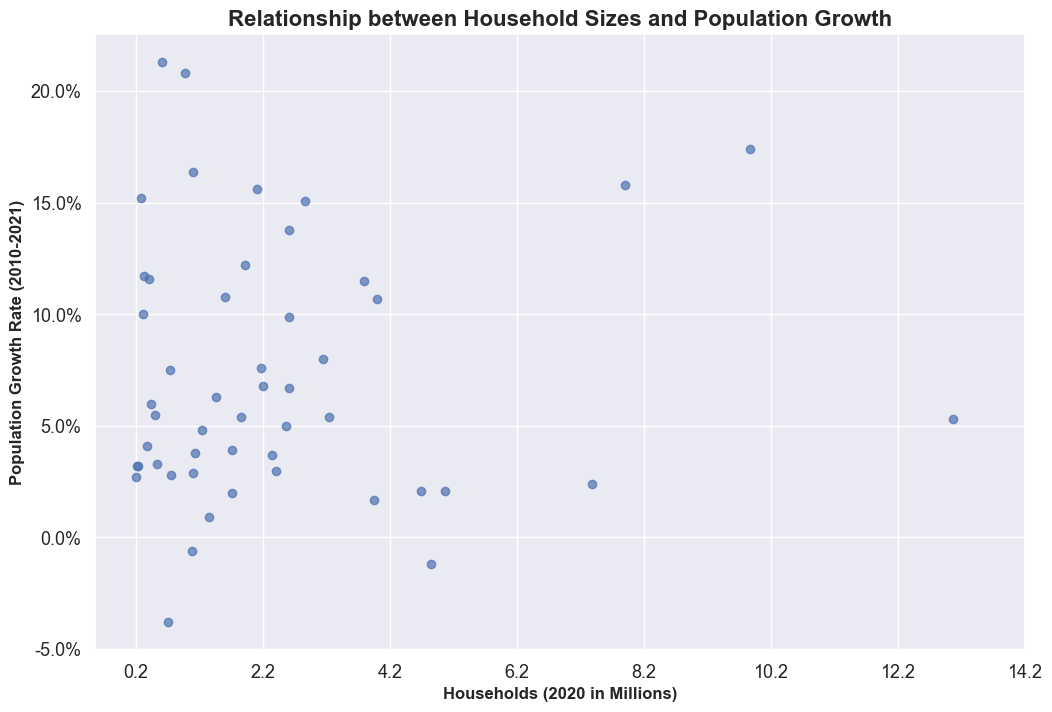

In [92]:
# Population growth trends from 2010 to 2021 and Households sizes in 2020 makeup across states using scatterplots
df_population = df[["State", "Total Population 2021", "Population Growth or Decline 2010 to 2021", "Households 2020",]]

y = df_population["Households 2020"]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_population["Households 2020"],
                df_population["Population Growth or Decline 2010 to 2021"],                
                alpha = 0.7,
                )

# Choose the interval to space out yticks
_min = np.min(y)
diff = 2_000_000  # Set the desired interval (e.g., 1 million)
ticks = np.arange(_min, np.max(y) + diff, diff)

plt.xticks(ticks=ticks, labels=[f"{val/1e6:.1f}" for val in ticks], fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))

plt.title("Relationship between Household Sizes and Population Growth", fontsize = 16, weight = "bold")
plt.xlabel("Households (2020 in Millions)", fontweight = "bold")
plt.ylabel("Population Growth Rate (2010-2021)", fontweight = "bold")
plt.show()

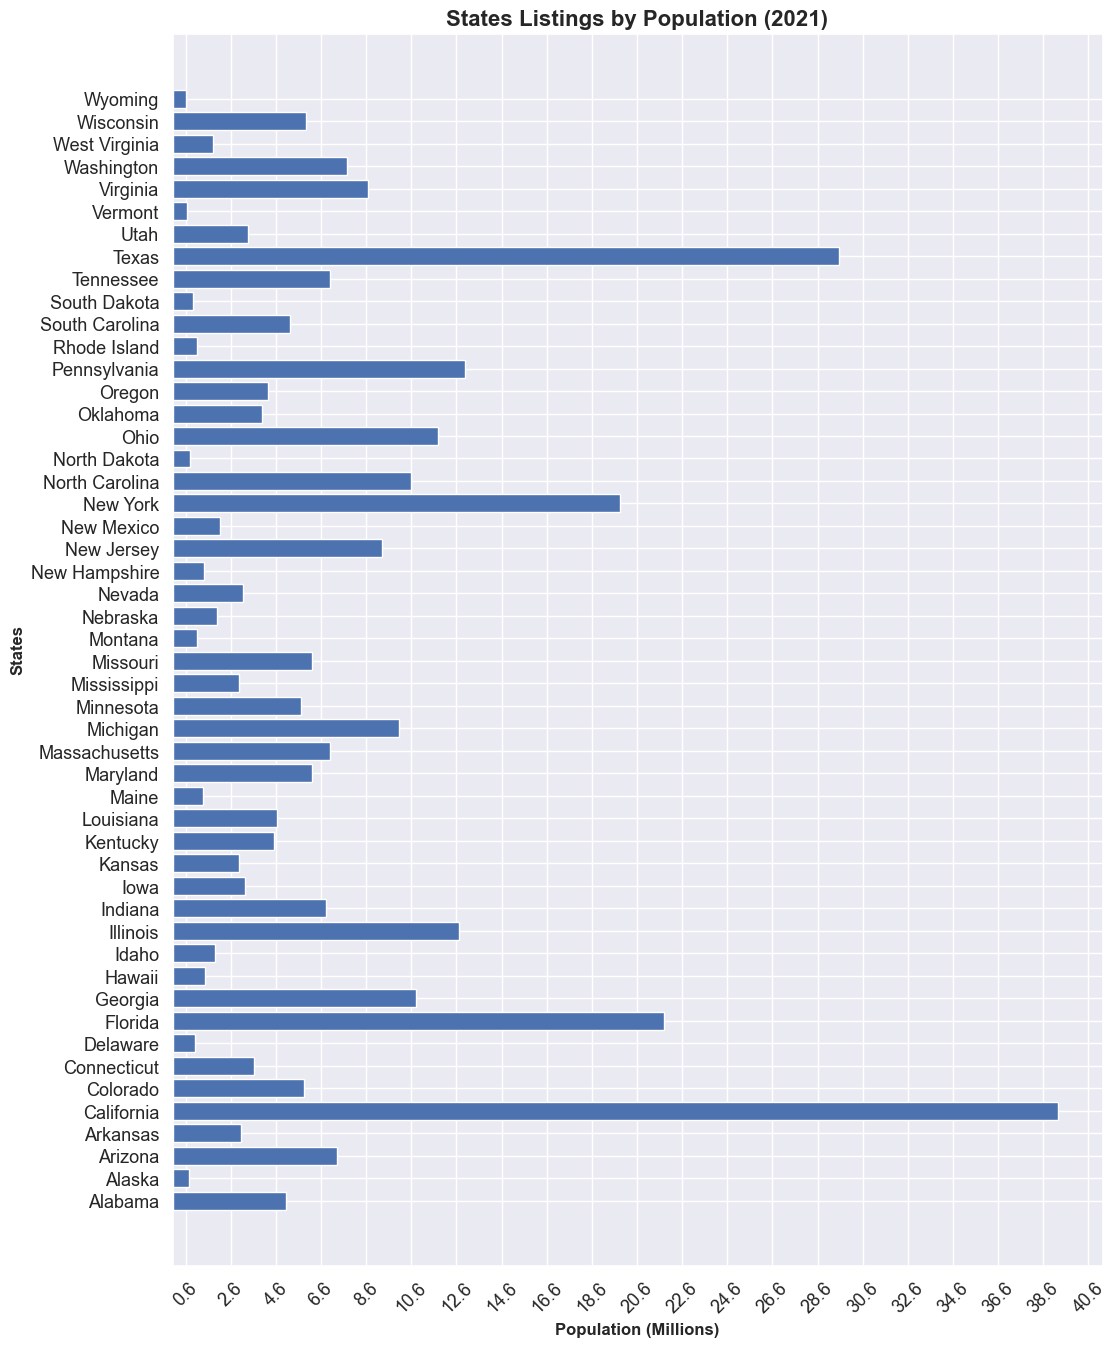

In [94]:
# Compare the total population of each state in 2021 using a horizontal bar chart. X-axis: Population, Y-axis: States.
# sns.set_style('white')
plt.figure(figsize = (12, 16))
x = df_population["Total Population 2021"]
y = df_population["State"]

plt.barh(y=y,
         width=x,
         )
# Choose the interval to space out xticks
_min = np.min(x)
diff = 2_000_000  # Set the desired interval (e.g., 1 million)
ticks = np.arange(_min, np.max(x) + diff, diff)

plt.xticks(ticks=ticks, labels=[f"{val/1e6:.1f}" for val in ticks], rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("States Listings by Population (2021)", fontsize = 16, fontweight = "bold")
plt.xlabel("Population (Millions)", fontweight = "bold")
plt.ylabel("States", fontweight = "bold")
# sns.despine()
plt.show()

* In this bar chart chart, California, Texas, and Florida are shown to be the most populous states.
* States like Wyoming, Vermont, and Alaska have the smallest populations.
* States like New York, Pennsylvania, Ohio, and Illinois fall in the middle range in terms of population

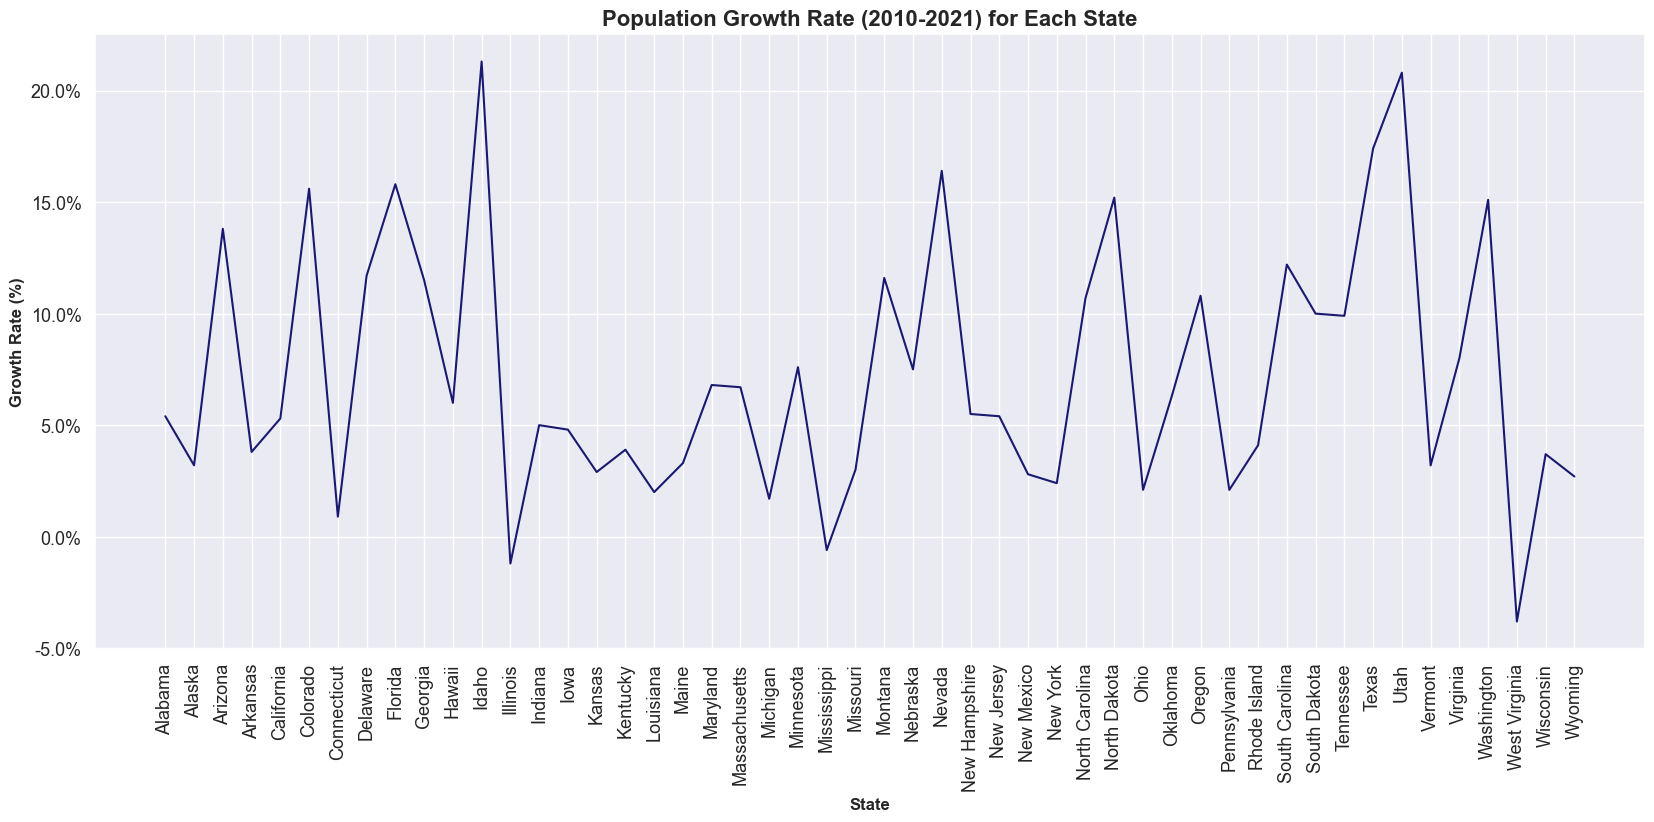

In [96]:
# Create a line chart to compare the population growth rate from 2010 to 2021 for each state. X-axis: States, Y-axis: Growth Rate.
plt.figure(figsize = (20, 8))
plt.plot(df_population["State"], df_population["Population Growth or Decline 2010 to 2021"], color = 'midnightblue')
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title('Population Growth Rate (2010-2021) for Each State', fontsize = 16, fontweight = 'bold')
plt.ylabel('Growth Rate (%)', fontweight = "bold")
plt.xlabel('State', fontweight = "bold")
plt.xticks(rotation=90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.show()

* In this plot, there is a noticable increase in growth rates in Idaho and Utah
* The spikes for smaller states could be attributed to economic growth and increased prosperity in those states
* States such as Illinois, Mississippi, and West Virginia have negative growth rates.
* These visible dips could indicate a continuing financial and housing crisis in the Post COVID-19 pandemic era.

In [8]:
# The percentage change for population every 10 years?
df_population_percent_change = df_population["Population Growth or Decline 2010 to 2021"] * 100

df_population_percent_change

1      5.4
2      3.2
3     13.8
4      3.8
5      5.3
6     15.6
7      0.9
8     11.7
9     15.8
10    11.5
11     6.0
12    21.3
13    -1.2
14     5.0
15     4.8
16     2.9
17     3.9
18     2.0
19     3.3
20     6.8
21     6.7
22     1.7
23     7.6
24    -0.6
25     3.0
26    11.6
27     7.5
28    16.4
29     5.5
30     5.4
31     2.8
32     2.4
33    10.7
34    15.2
35     2.1
36     6.3
37    10.8
38     2.1
39     4.1
40    12.2
41    10.0
42     9.9
43    17.4
44    20.8
45     3.2
46     8.0
47    15.1
48    -3.8
49     3.7
50     2.7
Name: Population Growth or Decline 2010 to 2021, dtype: float64

### **Findings**

* States with large populations like California and Texas do not exhibit the highest growth rates, indicating that larger populations might grow more slowly relative to smaller states.
* Smaller states with fewer households might be experiencing higher growth rates, potentially due to factors such as economic opportunities, housing availability, or quality of life improvements attracting more people.

### **Education Level Distribution**

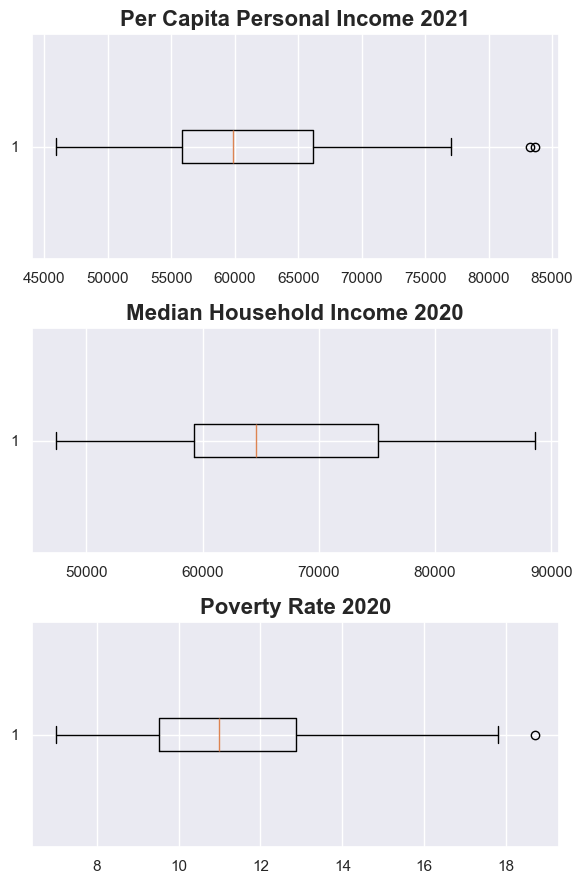

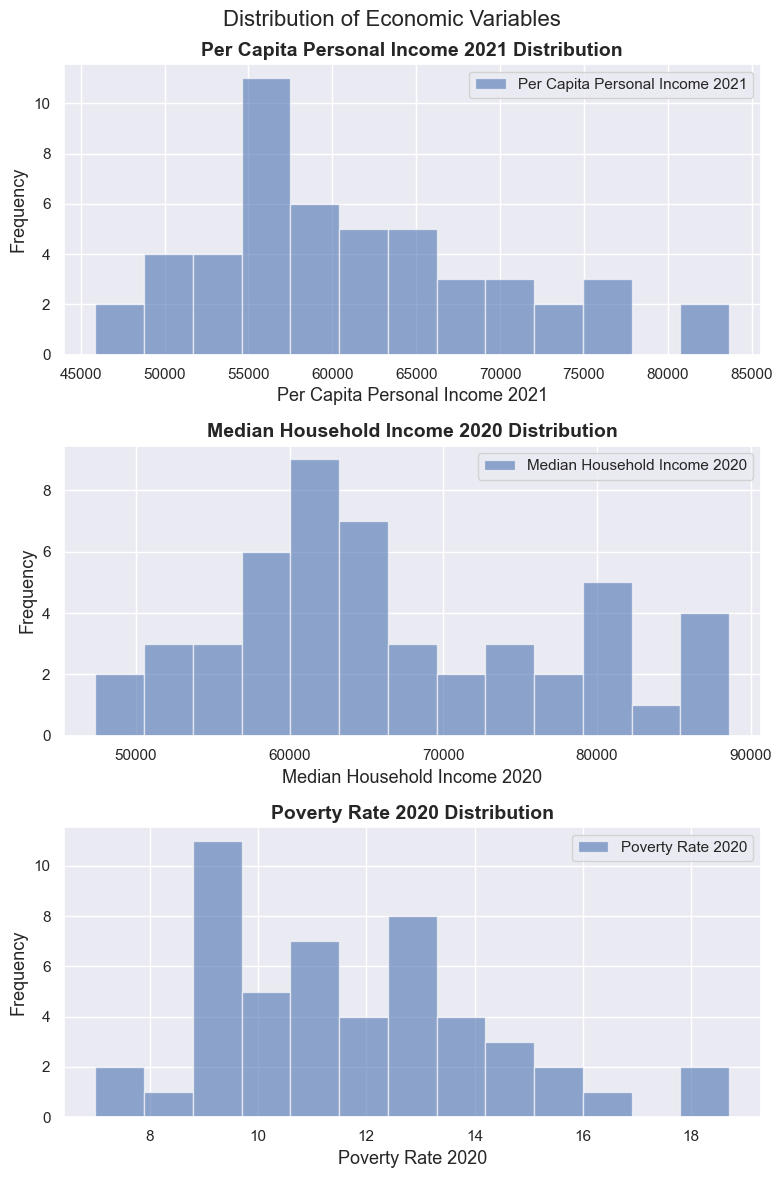

In [109]:
# Analyze the per capita income, median household income, and poverty rates across different states to identify economic disparities using box plots and histograms
economic_columns = ["Per Capita Personal Income 2021", "Median Household Income 2020", "Poverty Rate 2020"]
df_economic = df[economic_columns]

# Create a figure and axes
fig, axs = plt.subplots(nrows=len(df_economic.columns), figsize=(6, 9))

# Create horizontal boxplots for each variable
for ax, column in zip(axs, df_economic.columns):
    ax.boxplot(df_economic[column], vert=False)  # Add vert=False to make the boxplots horizontal
    ax.set_title(column, fontsize = 16, fontweight = "bold")

# Improve layout
plt.tight_layout()
plt.show()

# Create subplots for each economic indicator
fig, axes = plt.subplots(nrows=len(economic_columns), ncols=1, figsize=(8, 12))

# Generate histograms for each column
for i, col in enumerate(economic_columns):
    axes[i].hist(df_economic[col], bins=13, alpha=0.6, label=col)
    axes[i].set_title(f"{col} Distribution", fontsize = 14, fontweight = "bold")
    axes[i].set_xlabel(f"{col}", fontsize = 13)
    axes[i].set_ylabel("Frequency", fontsize = 13)
    axes[i].legend()

# Set a common title for the entire plot
fig.suptitle("Distribution of Economic Variables", fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

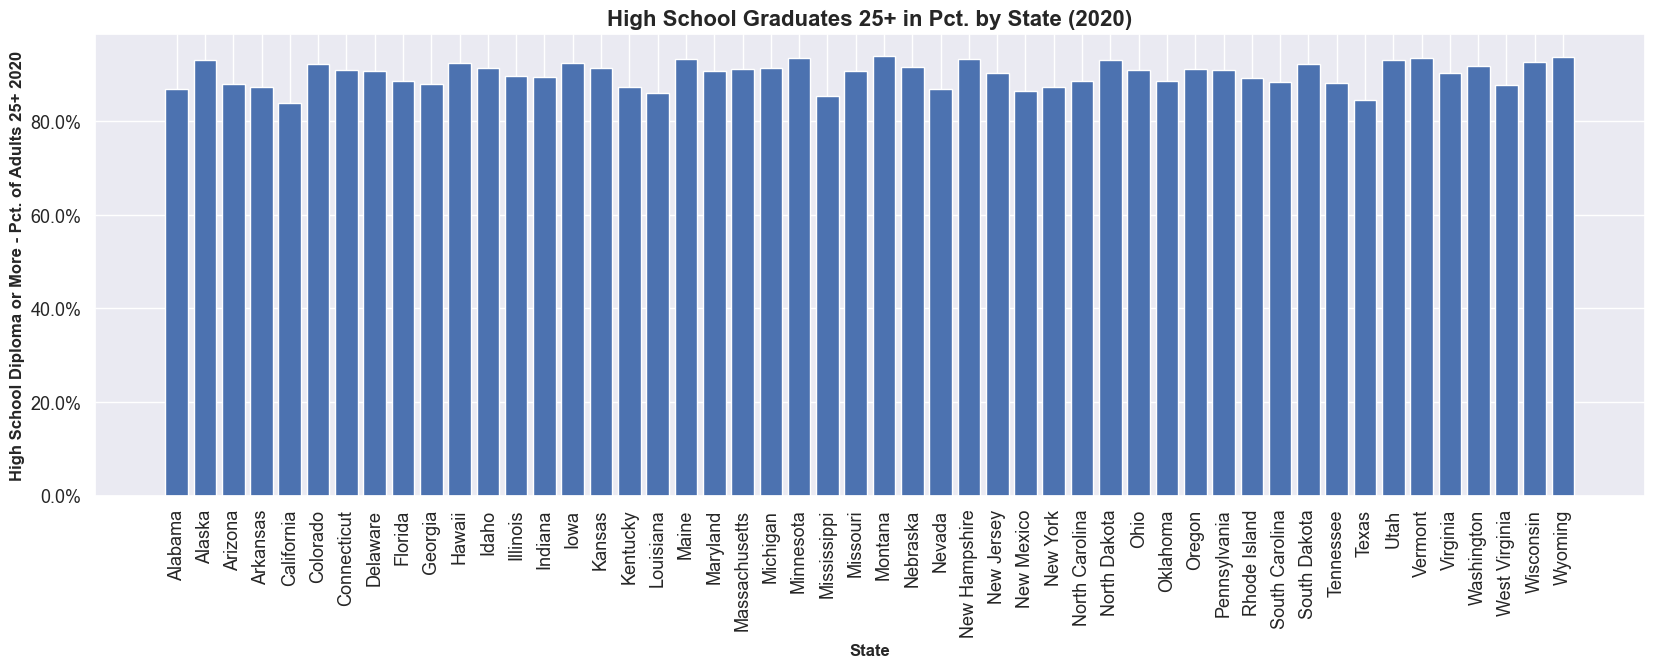

In [97]:
# Identify the percentage of adults 25+ with a high school diploma or more by state in 2020. Use a bar chart for visualization.
# sns.set_style('white')
df_diploma_plus = df[["State", "High School Diploma or More - Pct. of Adults 25+ 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize = (20, 6))
x = df_diploma_plus["State"]
y = df_diploma_plus["High School Diploma or More - Pct. of Adults 25+ 2020"]
# new_x = [2*i for i in x]

plt.bar(height=y,
         x=x,
        #  width=0.5
         )

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title("High School Graduates 25+ in Pct. by State (2020)", fontsize = 16, fontweight = "bold")
plt.ylabel("High School Diploma or More - Pct. of Adults 25+ 2020", fontweight = "bold")
plt.xlabel("State", fontweight = "bold")
# sns.despine()
plt.show()

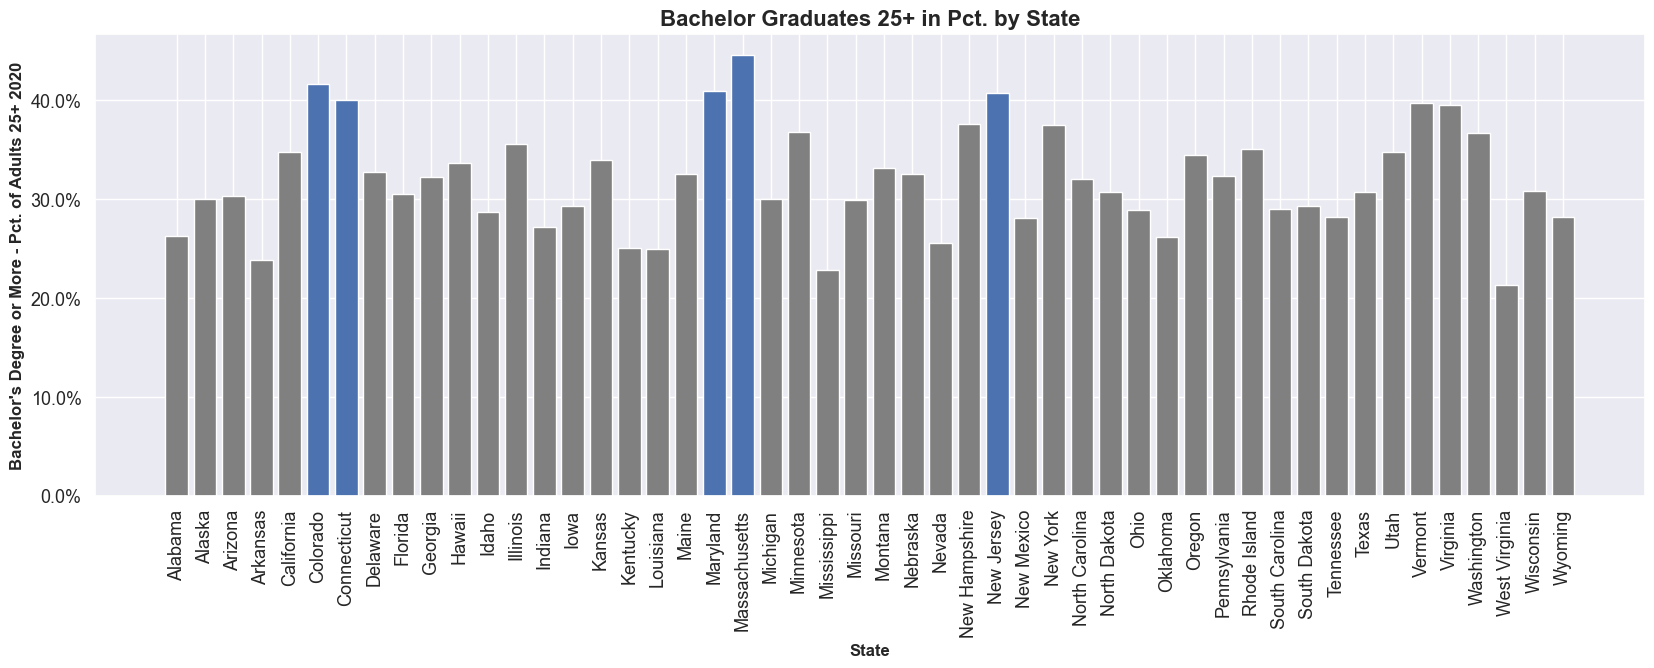

In [98]:
# Percentage of adults 25+ with a bachelor's degree or more by state in 2020. Highlight the top 5 states in a dark blue color.
# sns.set_style('white')
df_diploma_plus = df[["State", "High School Diploma or More - Pct. of Adults 25+ 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize = (20, 6))
x = df_diploma_plus["State"]
y = df_diploma_plus["Bachelor's Degree or More - Pct. of Adults 25+ 2020"]

colors = ['b' if state in df_diploma_plus.nlargest(5, "Bachelor's Degree or More - Pct. of Adults 25+ 2020")["State"].values else 'grey' for state in x]

plt.bar(height=y,
         x=x, color=colors
         )

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.title("Bachelor Graduates 25+ in Pct. by State", fontsize = 16, fontweight = "bold")
plt.ylabel("Bachelor's Degree or More - Pct. of Adults 25+ 2020", fontweight = "bold")
plt.xlabel("State", fontweight = "bold")
# sns.despine()
plt.show()

### **Findings**

* In the year 2020, the percentage of adults 25 or older with at least a high school diploma is above 80% for all states.
* California has the lowest percentage of high school graduates 25+ while Montana has the highest percentage.
* In contrast, the percentage of adults with at least a bachelor's degree 25 or older is significantly less than with at least a high school diploma per state.
* This indicates that financial burdens and admission standards for bachelor degrees likely contribute to the disparity between adults 25+ with a high school diploma and a bachelor's degree.
* The top 5 states with the highest percentage of adults 25+ with at least a bachelor's degree are Massachusetts, Colorado, Maryland, New Jersey, and Connecticut.
* Compared to other states, these top 5 states may benefit from a combination of higher high school graduation rates, funding, statewide education standards, scholarships awarded, and in-state scholarship programs.

### **Economic Disparity and Poverty**

C:\Users\Lothos\AppData\Local\Temp\ipykernel_27392\1864948763.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f"{x:.0%}" for x in ax2.get_yticks()])


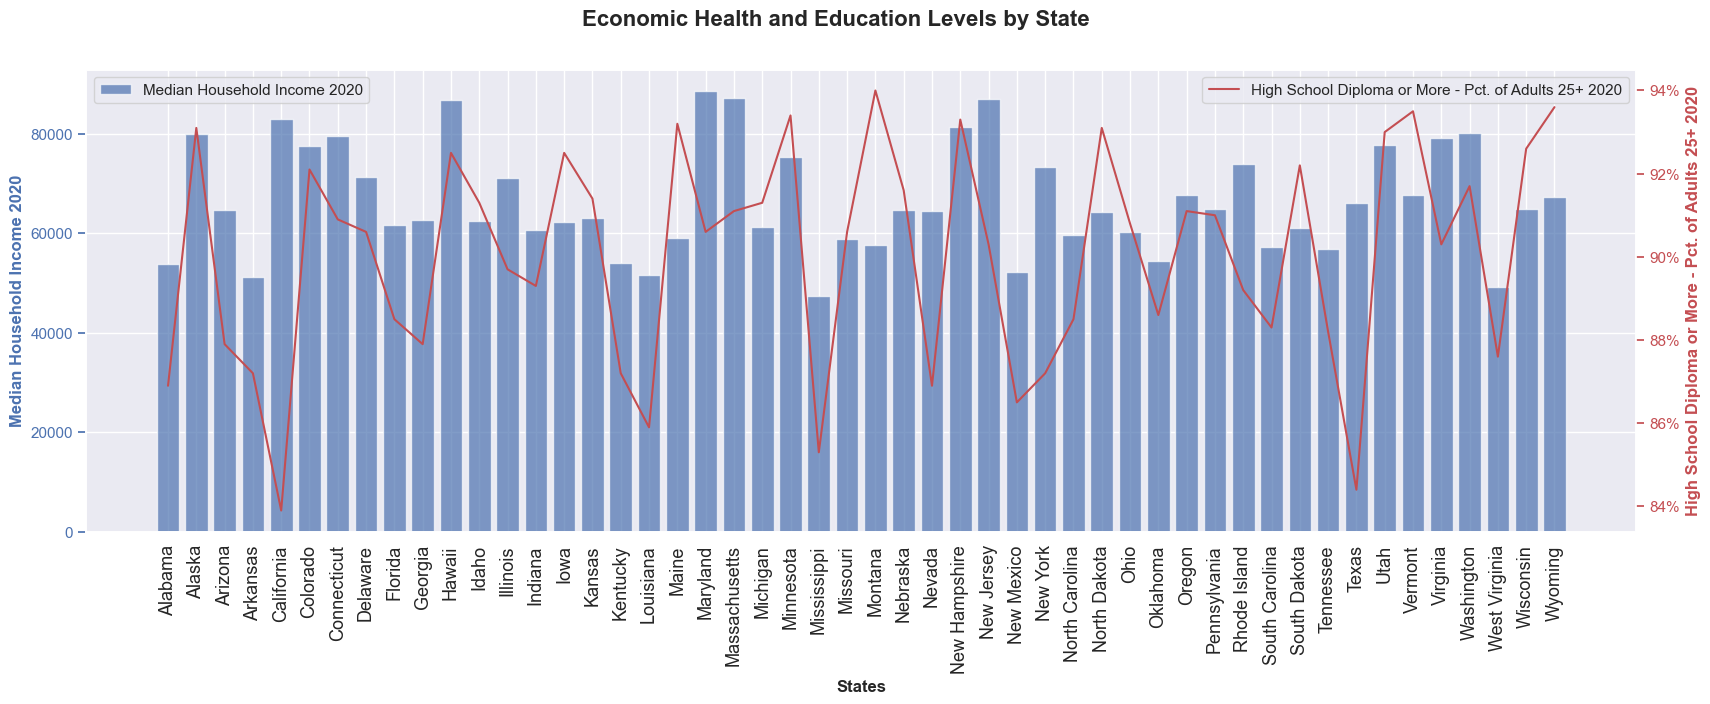

In [101]:
# Identify patterns in infrastructure and development that correlate with economic health, demographic makeup, and education levels, highlighting states with similar characteristics for targeted development or investment. Use a combination plot - bar and line graph to visualize this study
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for median household income
ax1.bar(df["State"], df["Median Household Income 2020"], color="b", alpha=0.7, label="Median Household Income 2020")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Median Household Income 2020", color="b", fontweight = "bold")
ax1.tick_params(axis="x", rotation=90, labelsize = 13)
ax1.tick_params(axis="y", colors="b")

# Line plot for high school diploma or more percentage
ax2 = ax1.twinx()
ax2.plot(df["State"], df["High School Diploma or More - Pct. of Adults 25+ 2020"], color="r", label="High School Diploma or More - Pct. of Adults 25+ 2020")
ax2.set_ylabel("High School Diploma or More - Pct. of Adults 25+ 2020", color="r", fontweight = "bold")
# Set y-axis tick labels to percentages
ax2.set_yticklabels([f"{x:.0%}" for x in ax2.get_yticks()])
ax2.tick_params(axis="y", colors="r")

# Disable the grid lines for ax2
ax2.grid(False)

# Title and legend
fig.suptitle("Economic Health and Education Levels by State", fontsize = 16, fontweight = "bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

* The combination plot (bar and line graph) highlights the relationship between median household income and the percentage of adults with at least a high school diploma. 
* States with higher median household incomes generally exhibit higher education levels.

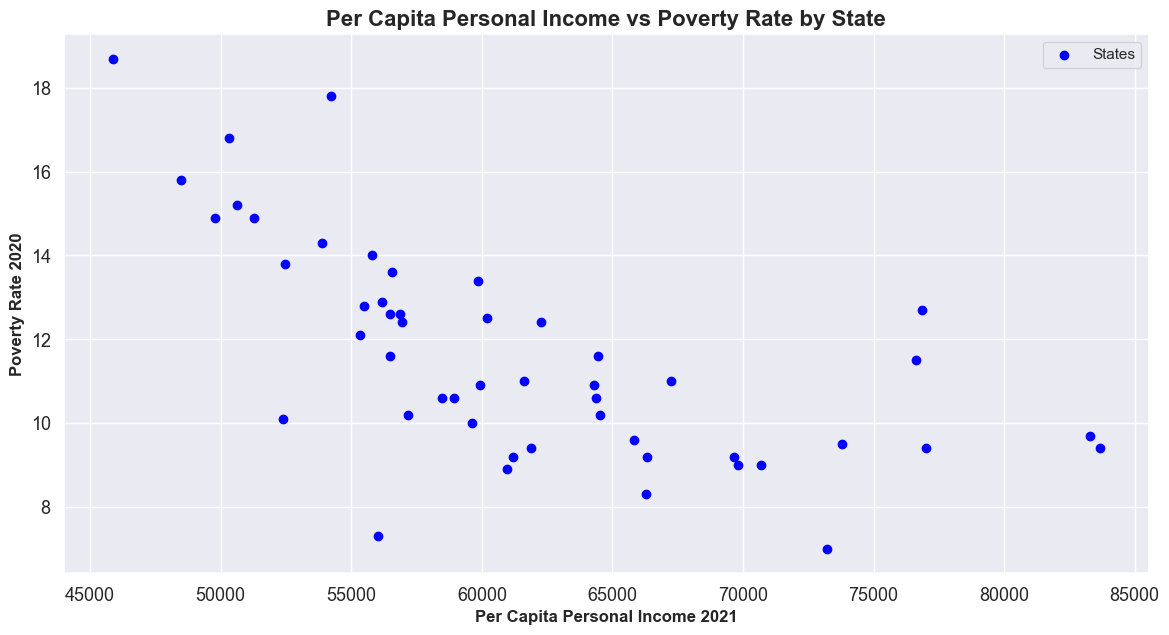

In [91]:
# Measure the economic disparity by plotting per capita personal income against the poverty rate for each state. Use a scatter plot for this analysis
# Plot a scatter plot for per capita personal income against the poverty rate for each state
plt.figure(figsize=(14, 7))
plt.scatter(df["Per Capita Personal Income 2021"], df["Poverty Rate 2020"], color="blue", label="States")
plt.title("Per Capita Personal Income vs Poverty Rate by State", fontsize = 16, fontweight = "bold")
plt.xlabel("Per Capita Personal Income 2021", fontweight = "bold")
plt.ylabel("Poverty Rate 2020", fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.legend()
plt.show()

* The scatter plot shows a general trend where states with higher per capita personal income tend to have lower poverty rates. 
* However, there are notable exceptions indicating disparities within states.

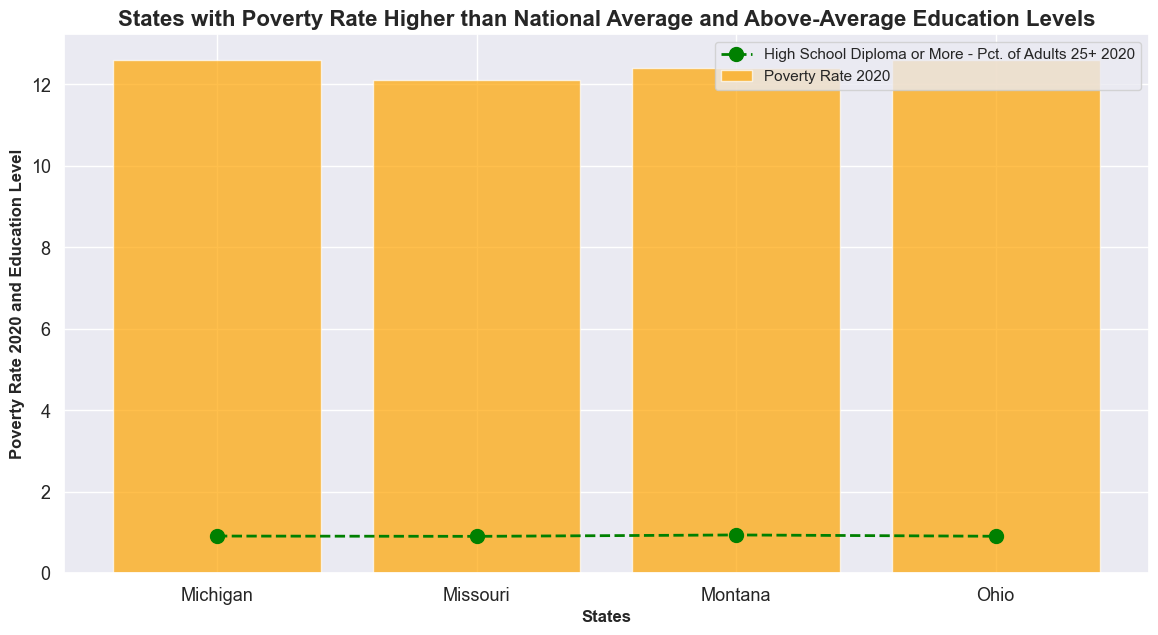

,State,Poverty Rate 2020,High School Diploma or More - Pct. of Adults 25+ 2020
22,Michigan,12.6,0.913
25,Missouri,12.1,0.906
26,Montana,12.4,0.940
35,Ohio,12.6,0.908


In [88]:
# Identify and visualize the states with a poverty rate higher than the national average but with above-average education levels (high school diploma or more, bachelor's degree or more).

# Calculate the national average for poverty rate
national_avg_poverty_rate = df["Poverty Rate 2020"].mean()
# Identify states with a poverty rate higher than the national average but with above-average education levels
above_avg_education = df[(df["Poverty Rate 2020"] > national_avg_poverty_rate) &
                         (df["High School Diploma or More - Pct. of Adults 25+ 2020"] > df["High School Diploma or More - Pct. of Adults 25+ 2020"].mean())]
#Visualize the states with a poverty rate higher than the national average but with above-average education levels
plt.figure(figsize = (14, 7))
plt.bar(above_avg_education["State"], above_avg_education["Poverty Rate 2020"], color = "orange", alpha = 0.7, label = "Poverty Rate 2020")
plt.plot(above_avg_education["State"], above_avg_education["High School Diploma or More - Pct. of Adults 25+ 2020"], color="green", marker="o", linestyle="dashed", linewidth=2, markersize=10, label="High School Diploma or More - Pct. of Adults 25+ 2020")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Poverty Rate 2020 and Education Level", fontweight = "bold")
plt.title("States with Poverty Rate Higher than National Average and Above-Average Education Levels", fontsize = 16, fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.grid(True)
plt.show()

# Display the dataframe in a user-friendly format
above_avg_education[["State", "Poverty Rate 2020", "High School Diploma or More - Pct. of Adults 25+ 2020"]]

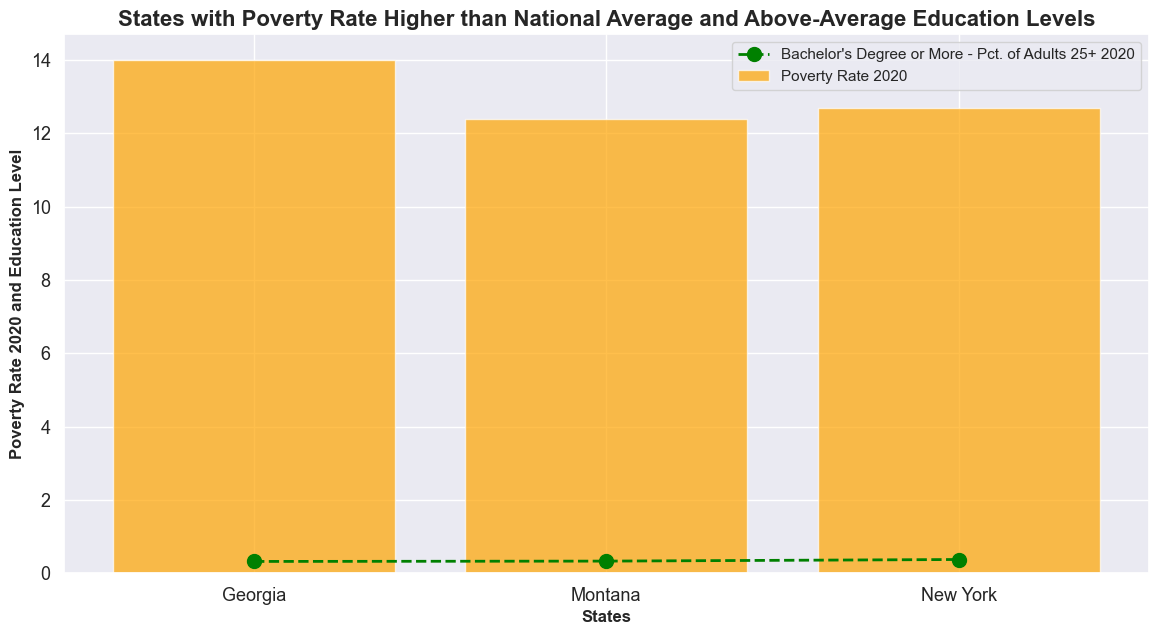

,State,Poverty Rate 2020,Bachelor's Degree or More - Pct. of Adults 25+ 2020
10,Georgia,14.0,0.322
26,Montana,12.4,0.331
32,New York,12.7,0.375


In [89]:
# Calculate the national average for poverty rate
national_avg_poverty_rate = df["Poverty Rate 2020"].mean()
# Identify states with a poverty rate higher than the national average but with above-average education levels
above_avg_education = df[(df["Poverty Rate 2020"] > national_avg_poverty_rate) &
                         (df["Bachelor's Degree or More - Pct. of Adults 25+ 2020"] > df["Bachelor's Degree or More - Pct. of Adults 25+ 2020"].mean())]
#Visualize the states with a poverty rate higher than the national average but with above-average education levels
plt.figure(figsize = (14, 7))
plt.bar(above_avg_education["State"], above_avg_education["Poverty Rate 2020"], color = "orange", alpha = 0.7, label = "Poverty Rate 2020")
plt.plot(above_avg_education["State"], above_avg_education["Bachelor's Degree or More - Pct. of Adults 25+ 2020"], color="green", marker="o", linestyle="dashed", linewidth=2, markersize=10, label="Bachelor's Degree or More - Pct. of Adults 25+ 2020")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Poverty Rate 2020 and Education Level", fontweight = "bold")
plt.title("States with Poverty Rate Higher than National Average and Above-Average Education Levels", fontsize = 16, fontweight = "bold")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.grid(True)
plt.show()

# Display the dataframe in a user-friendly format
above_avg_education[["State", "Poverty Rate 2020", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]

* Michigan, Missouri, Montana, and Ohio stand out with higher poverty rates yet above-average education levels (High School Diploma or more). 
* Georgia, Montana, and New York stand out with higher poverty rates yet above-average education levels (Bachelor's degree or more).
* This indicates that factors other than education, such as job availability, and economic opportunities, may play a significant role in the economic disparity in these states.

### **Sector Analysis**

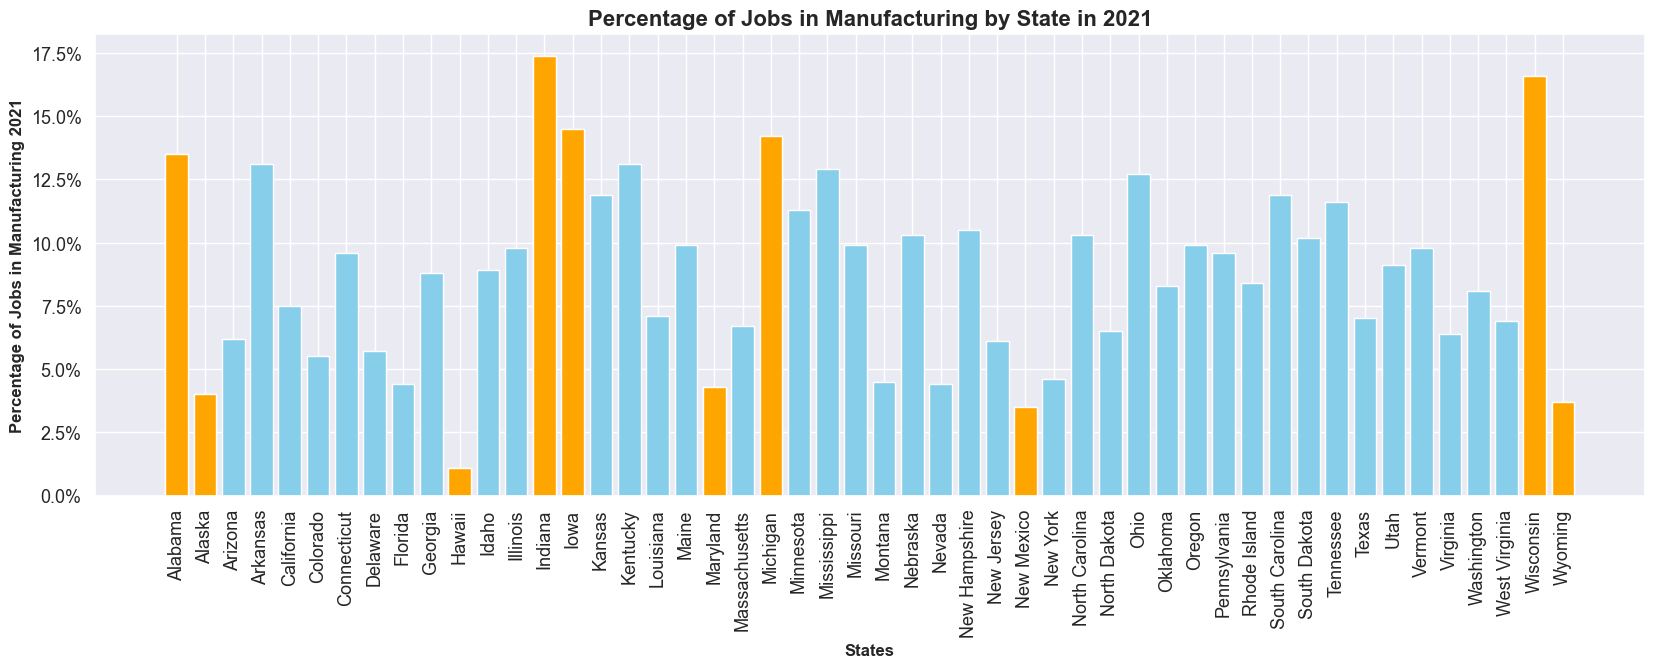

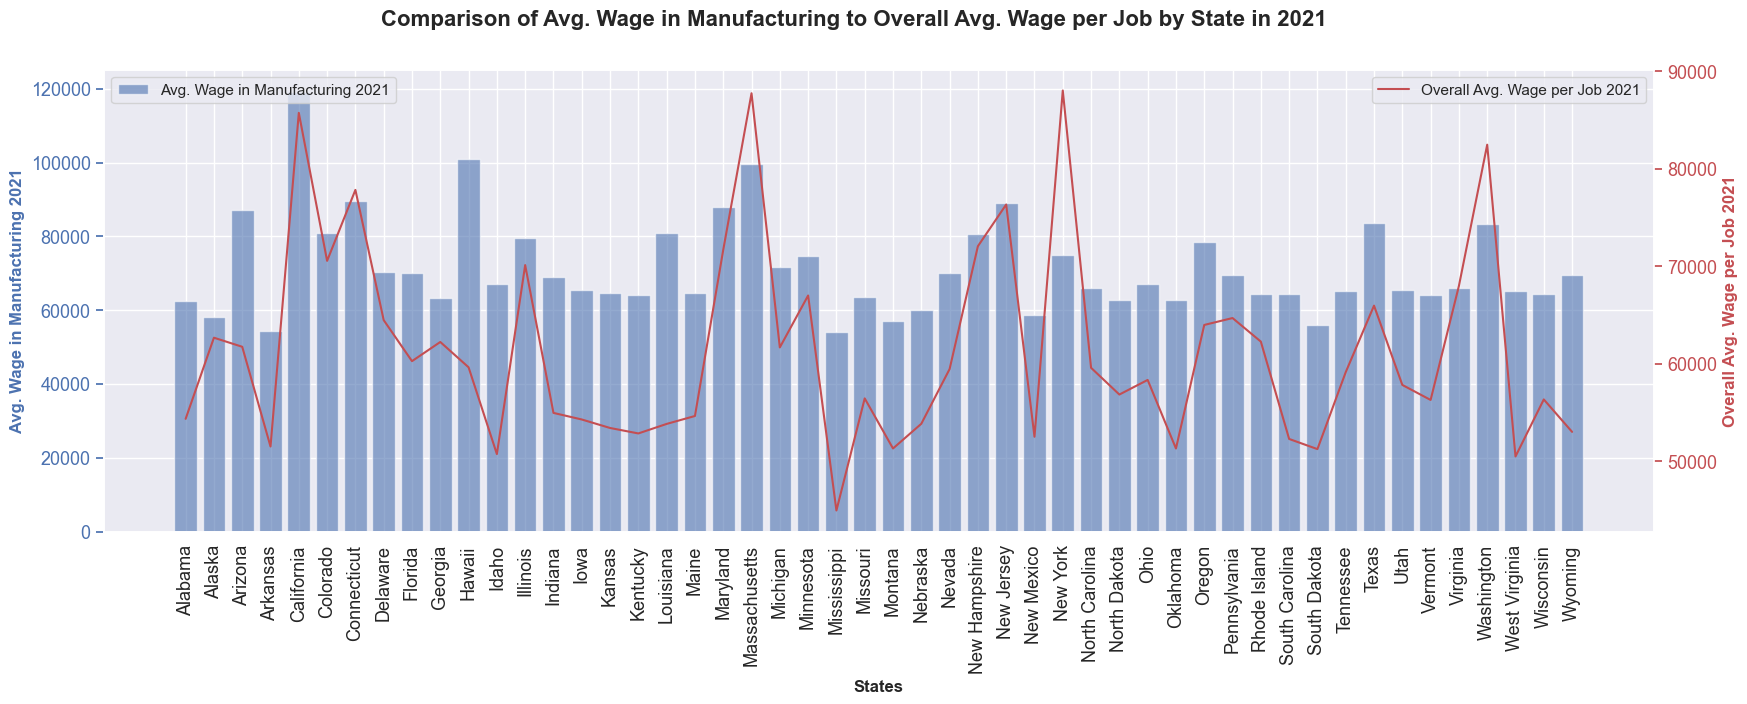

In [126]:
# Plot the percentage of all jobs that are in manufacturing by state in 2021, and highlight the top and bottom 5 states.
manufacturing_data = df[["State", "Manufacturing - Pct. All Jobs in County 2021", "Manufacturing - Avg Wage per Job 2021", "Avg Wage per Job 2021"]]

# Sort the data by the percentage of jobs in manufacturing to find the top and bottom 5 states
top_5_manufacturing = manufacturing_data.nlargest(5, "Manufacturing - Pct. All Jobs in County 2021")
bottom_5_manufacturing = manufacturing_data.nsmallest(5, "Manufacturing - Pct. All Jobs in County 2021")

# Combine top and bottom 5 states for highlighting
highlight_states_manufacturing = pd.concat([top_5_manufacturing, bottom_5_manufacturing])

# Plot the percentage of all jobs that are in manufacturing by state in 2021, highlighting the top and bottom 5 states
plt.figure(figsize=(20, 6))
plt.bar(manufacturing_data["State"], manufacturing_data["Manufacturing - Pct. All Jobs in County 2021"], color = "skyblue")
plt.bar(highlight_states_manufacturing["State"], highlight_states_manufacturing["Manufacturing - Pct. All Jobs in County 2021"], color = "orange")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Percentage of Jobs in Manufacturing 2021", fontweight = "bold")
plt.title("Percentage of Jobs in Manufacturing by State in 2021", fontsize = 16, fontweight = "bold")
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.show()

# Compare the average wage in manufacturing to the overall average wage per job for each state using a dual-axis chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for average wage in manufacturing
ax1.bar(manufacturing_data["State"], manufacturing_data["Manufacturing - Avg Wage per Job 2021"], color = "b", alpha = 0.6, label = "Avg. Wage in Manufacturing 2021")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Avg. Wage in Manufacturing 2021", color = "b", fontweight = "bold")
ax1.tick_params(axis = "x", rotation = 90, labelsize = 13)
ax1.tick_params(axis = "y", colors = "b", labelsize = 13)

# Line plot for overall average wage per job
ax2 = ax1.twinx()
ax2.plot(manufacturing_data["State"], manufacturing_data["Avg Wage per Job 2021"], color = "r", label = "Overall Avg. Wage per Job 2021")
ax2.set_ylabel("Overall Avg. Wage per Job 2021", color = "r", fontweight = "bold")
ax2.tick_params(axis = "y", colors = "r", labelsize = 13)

ax2.grid(False)

# Title and legend
fig.suptitle("Comparison of Avg. Wage in Manufacturing to Overall Avg. Wage per Job by State in 2021", fontsize = 16, fontweight = "bold")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()


* Midwestern and southern states dominate the manufacturing sector.
* The states with the highest percentage of jobs in manufacturing are Wisconsin, Indiana, Iowa, Michigan, and Alabama.
* The states with the lowest percentage of jobs in manufacturing are Hawaii, New Mexico, Wyoming, Alaska, and Maryland.
* The average wage in manufacturing is generally higher than the overall average wage per job across most states.
* States like Arizona, California, Hawaii, and Louisiana have a significantly higher average wage in manufacturing compared to their overall average wage.
* This indicates that the manufacturing sector offers competitive wages, which can be a point of attraction for job seekers in states where this sector is prominent.

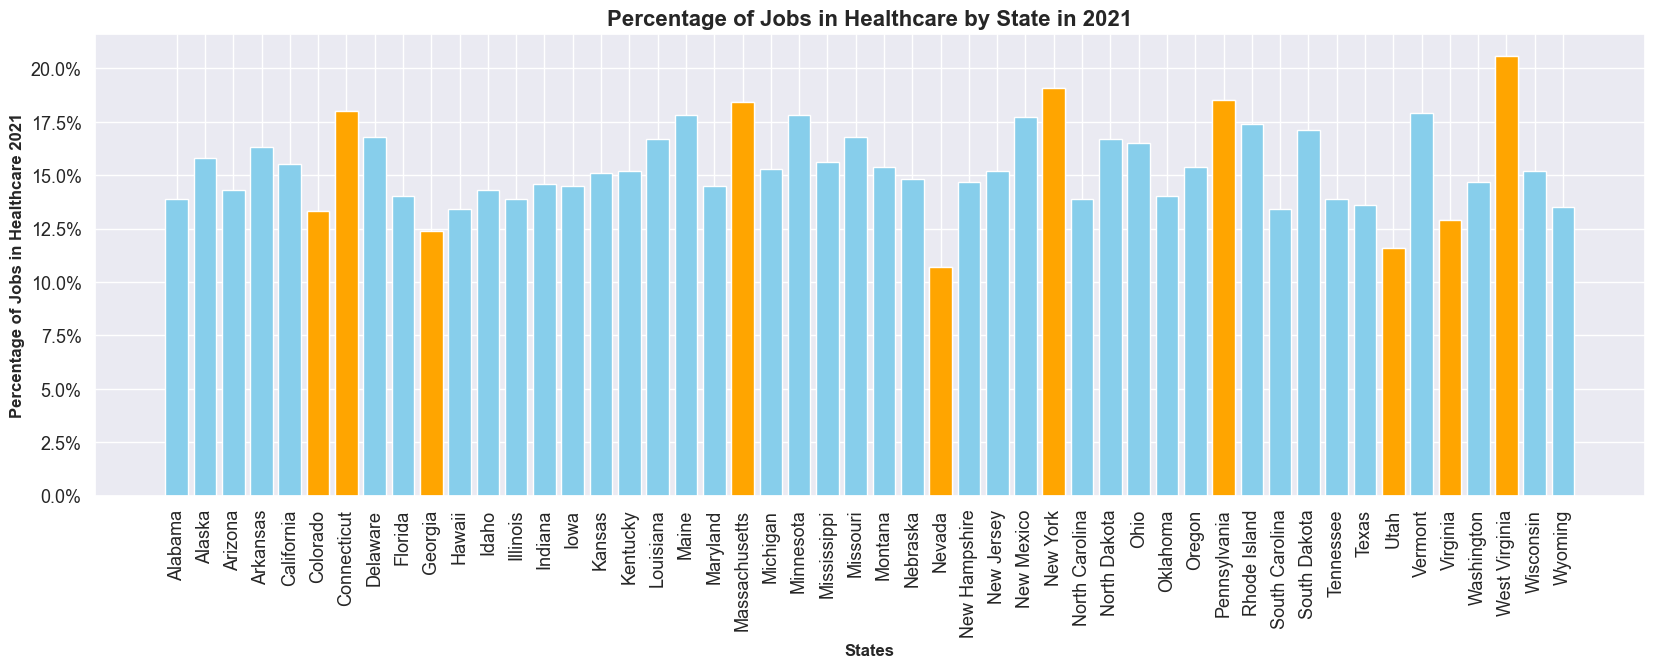

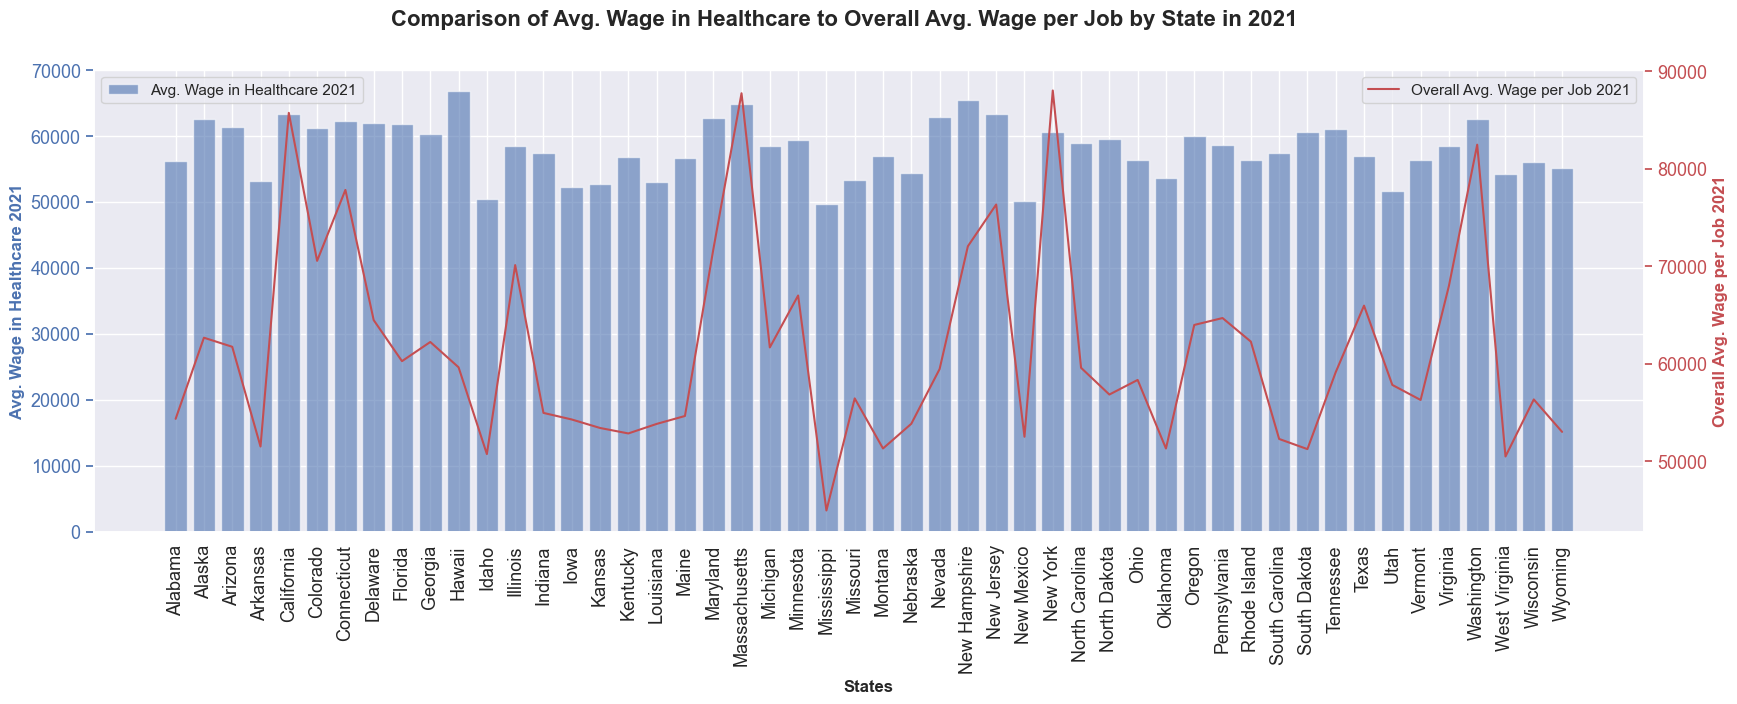

In [127]:
# Plot the percentage of all jobs that are in healthcare by state in 2021, and highlight the top and bottom 5 states.
healthcare_data = df[["State", "Health Care, Social Assist. - Pct. All Jobs in County 2021", "Health Care, Social Assist. - Avg Wage per Job 2021", "Avg Wage per Job 2021"]]

# Sort the data by the percentage of jobs in healthcare to find the top and bottom 5 states
top_5_healthcare = healthcare_data.nlargest(5, "Health Care, Social Assist. - Pct. All Jobs in County 2021")
bottom_5_healthcare = healthcare_data.nsmallest(5, "Health Care, Social Assist. - Pct. All Jobs in County 2021")

# Combine top and bottom 5 states for highlighting
hightlight_states_healthcare = pd.concat([top_5_healthcare, bottom_5_healthcare])

# Plot the percentage of all jobs that are in healthcare by state in 2021, highlighting the top and bottom 5 states
plt.figure(figsize=(20, 6))
plt.bar(healthcare_data["State"], healthcare_data["Health Care, Social Assist. - Pct. All Jobs in County 2021"], color = "skyblue")
plt.bar(hightlight_states_healthcare["State"], hightlight_states_healthcare["Health Care, Social Assist. - Pct. All Jobs in County 2021"], color = "orange")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Percentage of Jobs in Healthcare 2021", fontweight = "bold")
plt.title("Percentage of Jobs in Healthcare by State in 2021", fontsize = 16, fontweight = "bold")
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.show()

# Compare the average wage in healthcare to the overall average wage per job for each state using a dual-axis chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for average wage in healthcare
ax1.bar(healthcare_data["State"], healthcare_data["Health Care, Social Assist. - Avg Wage per Job 2021"], color = "b", alpha = 0.6, label = "Avg. Wage in Healthcare 2021")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Avg. Wage in Healthcare 2021", color = "b", fontweight = "bold")
ax1.tick_params(axis = "x", rotation = 90, labelsize = 13)
ax1.tick_params(axis = "y", colors = "b", labelsize = 13)

# Line plot for overall average wage per job
ax2 = ax1.twinx()
ax2.plot(healthcare_data["State"], healthcare_data["Avg Wage per Job 2021"], color = "r", label = "Overall Avg. Wage per Job 2021")
ax2.set_ylabel("Overall Avg. Wage per Job 2021", color = "r", fontweight = "bold")
ax2.tick_params(axis = "y", colors = "r", labelsize = 13)

ax2.grid(False)

# Title and legend
fig.suptitle("Comparison of Avg. Wage in Healthcare to Overall Avg. Wage per Job by State in 2021", fontsize = 16, fontweight = "bold")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()


* Northeastern states are prominant in the healthcare sector.
* The states with the highest percentage of jobs in healthcare are West Virginia, New York, Pennsylvania, Massachusetts, and Connecticut.
* The states with the lowest percentage of jobs in healthcare are Nevada, Utah, Georgia, Virginia, and Colorado.
* The average wage in healthcare is generally close to or slightly lower than the overall average wage per job across most states.
* This indicates that states with a higher concentration of healthcare jobs tend to offer competitive wages within the sector, though it my not always exceed the overall average wage.

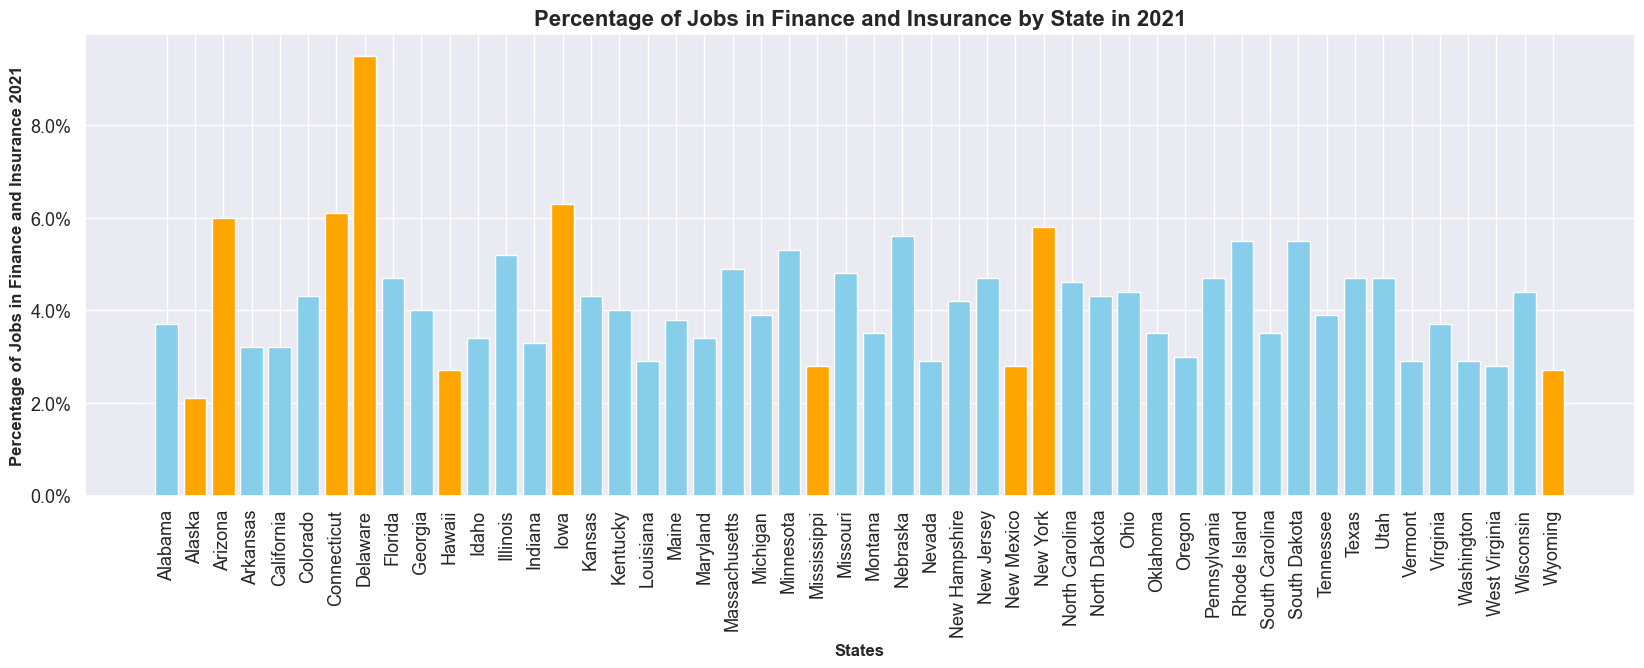

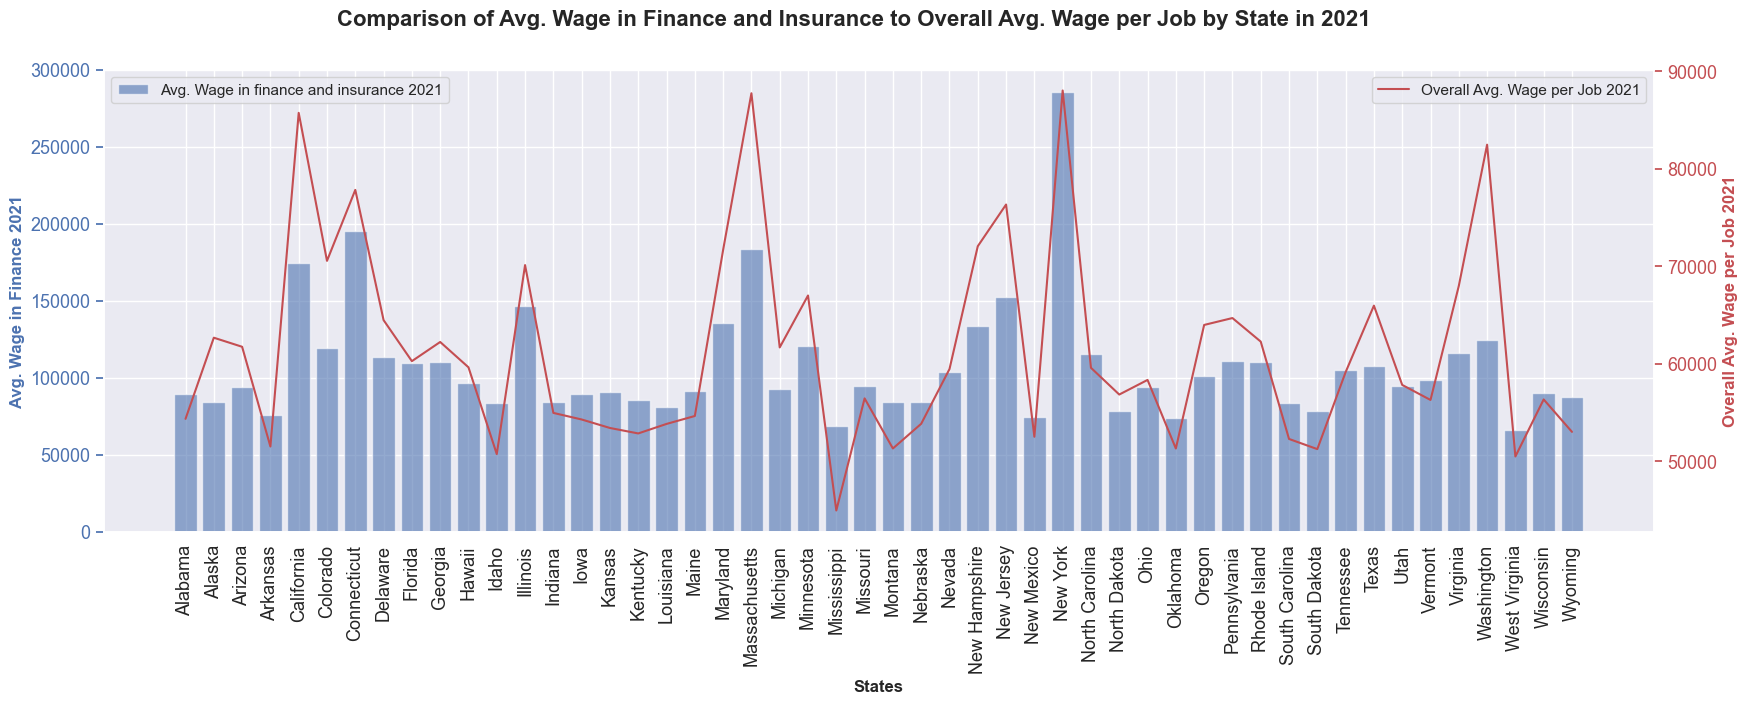

In [128]:
# Plot the percentage of all jobs that are in finance and insurance by state in 2021, and highlight the top and bottom 5 states.
fincance_data = df[["State", "Finance and Insurance - Pct. All Jobs in County 2021", "Finance and Insurance - Avg Wage per Job 2021", "Avg Wage per Job 2021"]]

# Sort the data by the percentage of jobs in finance and insurance to find the top and bottom 5 states
top_5_finance = fincance_data.nlargest(5, "Finance and Insurance - Pct. All Jobs in County 2021")
bottom_5_finance = fincance_data.nsmallest(5, "Finance and Insurance - Pct. All Jobs in County 2021")

# Combine top and bottom 5 states for highlighting
highlight_states_finance = pd.concat([top_5_finance, bottom_5_finance])

# Plot the percentage of all jobs that are in finance and insurance by state in 2021, highlighting the top and bottom 5 states
plt.figure(figsize=(20, 6))
plt.bar(fincance_data["State"], fincance_data["Finance and Insurance - Pct. All Jobs in County 2021"], color = "skyblue")
plt.bar(highlight_states_finance["State"], highlight_states_finance["Finance and Insurance - Pct. All Jobs in County 2021"], color = "orange")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Percentage of Jobs in Finance and Insurance 2021", fontweight = "bold")
plt.title("Percentage of Jobs in Finance and Insurance by State in 2021", fontsize = 16, fontweight = "bold")
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.show()

# Compare the average wage in finance and insurance to the overall average wage per job for each state using a dual-axis chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for average wage in finance and insurance
ax1.bar(fincance_data["State"], fincance_data["Finance and Insurance - Avg Wage per Job 2021"], color = "b", alpha = 0.6, label = "Avg. Wage in finance and insurance 2021")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Avg. Wage in Finance 2021", color = "b", fontweight = "bold")
ax1.tick_params(axis = "x", rotation = 90, labelsize = 13)
ax1.tick_params(axis = "y", colors = "b", labelsize = 13)

# Line plot for overall average wage per job
ax2 = ax1.twinx()
ax2.plot(fincance_data["State"], fincance_data["Avg Wage per Job 2021"], color = "r", label = "Overall Avg. Wage per Job 2021")
ax2.set_ylabel("Overall Avg. Wage per Job 2021", color = "r", fontweight = "bold")
ax2.tick_params(axis = "y", colors = "r", labelsize = 13)

ax2.grid(False)

# Title and legend
fig.suptitle("Comparison of Avg. Wage in Finance and Insurance to Overall Avg. Wage per Job by State in 2021", fontsize = 16, fontweight = "bold")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()


* Northeastern and some central states are concentrated in the finance and insurance sector.
* The states with the highest percentage of jobs in finance and insurance are Delaware, Iowa, Connecticut, Arizona, and New York.
* The states with the lowest percentage of jobs in finance and insurance are Alaska, Hawaii, Mississippi, New Mexico, and Wyoming.
* The average wage in finance and insurance is significantly higher than the overall average wage per job across most states.
* States like California, Connecticut, Massachusetts, New Jersey, and New York have a significantly higher average wage in finance and insurance compared to their overall average wage.
* This indicates a strong financial sector presence, particularly in states that are financial hubs, and highlights the sector's capacity to offer lucrative job opportunities.

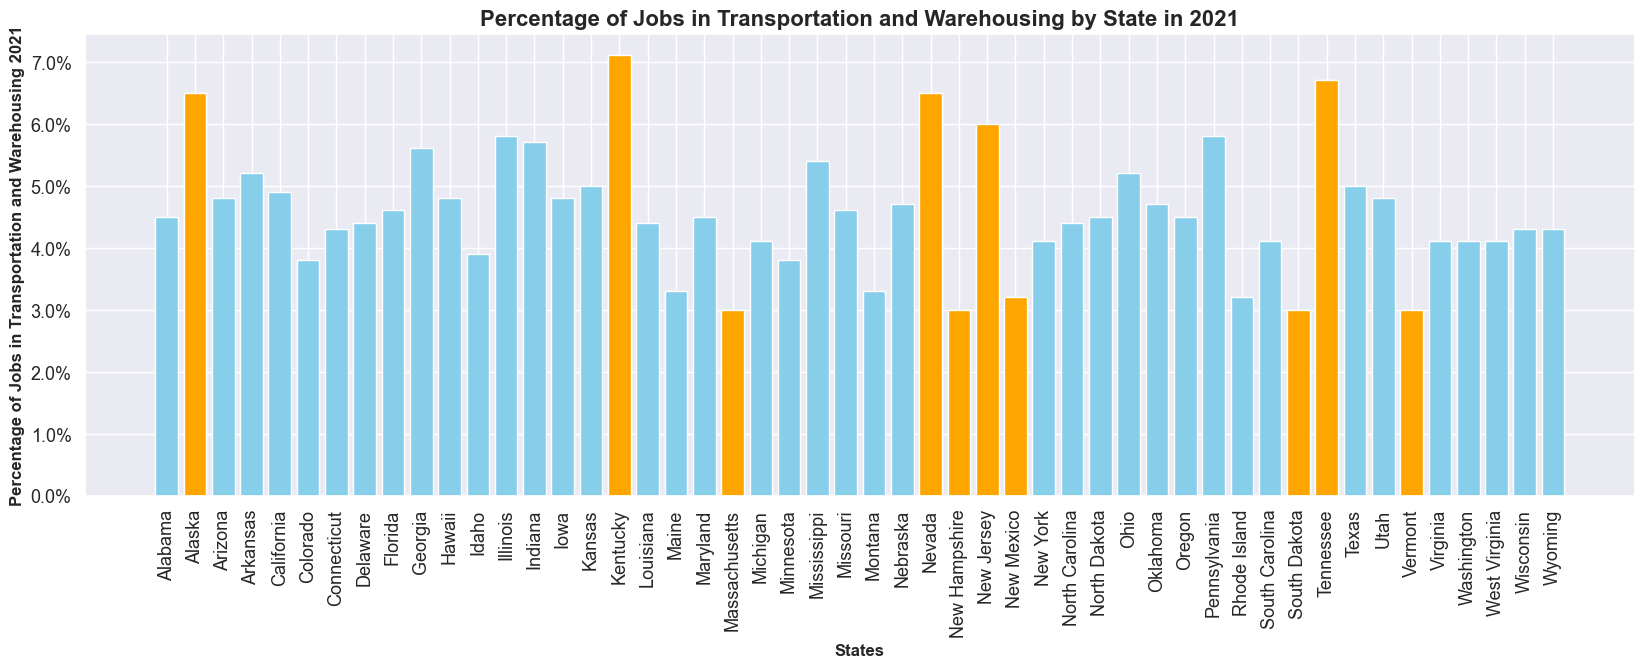

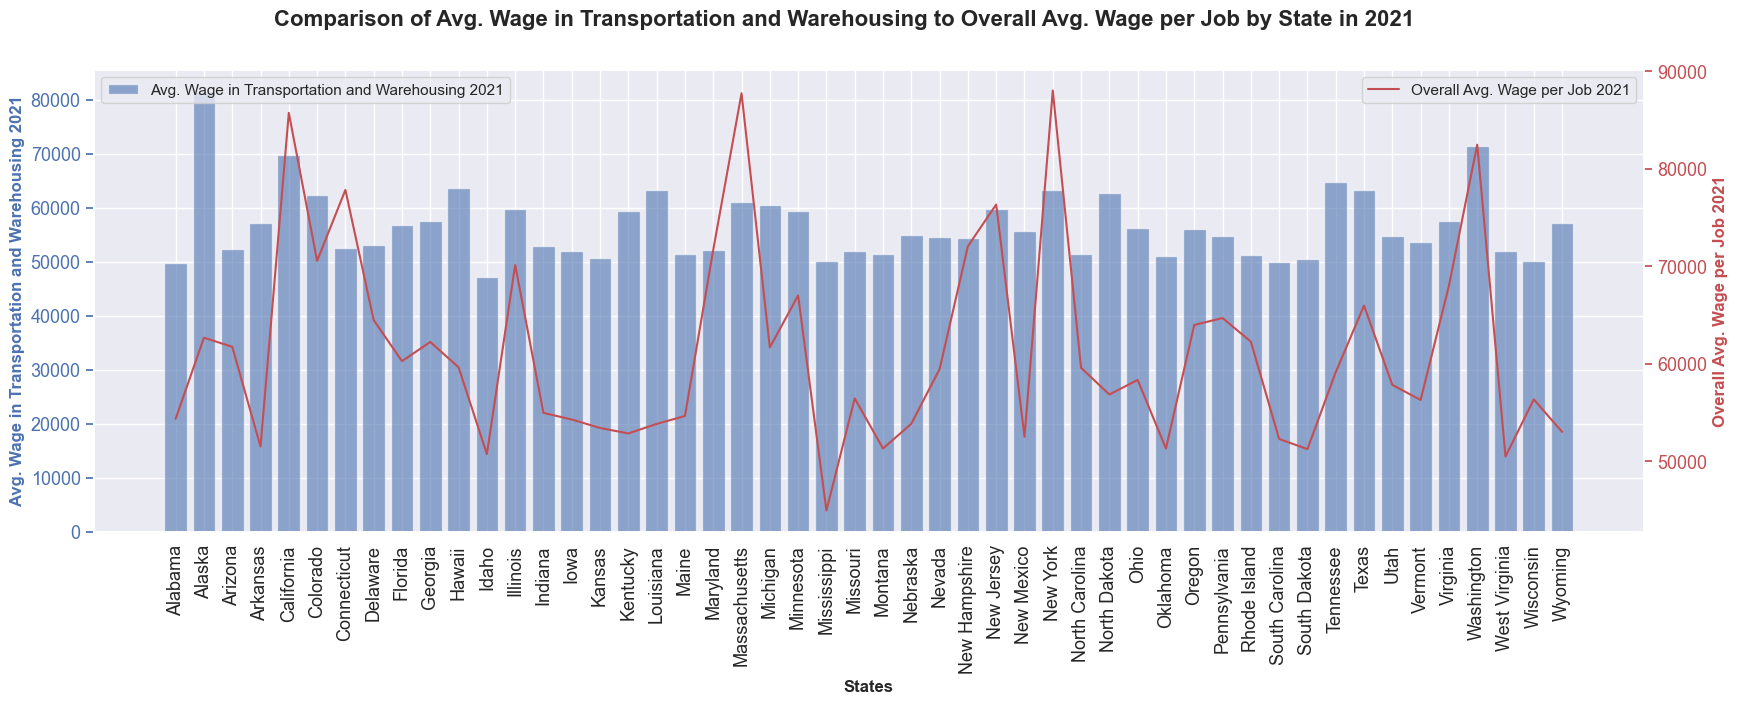

In [129]:
# Plot the percentage of all jobs that are in transportation by state in 2021, and highlight the top and bottom 5 states.
transportation_data = df[["State", "Transportation and Warehousing - Pct. All Jobs in County 2021", "Transportation and Warehousing - Avg Wage per Job 2021", "Avg Wage per Job 2021"]]

# Sort the data by the percentage of jobs in transportation to find the top and bottom 5 states
top_5_transportation = transportation_data.nlargest(5, "Transportation and Warehousing - Pct. All Jobs in County 2021")
bottom_5_transportation = transportation_data.nsmallest(5, "Transportation and Warehousing - Pct. All Jobs in County 2021")

# Combine top and bottom 5 states for highlighting
highlight_states_transportation = pd.concat([top_5_transportation, bottom_5_transportation])

# Plot the percentage of all jobs that are in transportation by state in 2021, highlighting the top and bottom 5 states
plt.figure(figsize=(20, 6))
plt.bar(transportation_data["State"], transportation_data["Transportation and Warehousing - Pct. All Jobs in County 2021"], color = "skyblue")
plt.bar(highlight_states_transportation["State"], highlight_states_transportation["Transportation and Warehousing - Pct. All Jobs in County 2021"], color = "orange")
plt.xlabel("States", fontweight = "bold")
plt.ylabel("Percentage of Jobs in Transportation and Warehousing 2021", fontweight = "bold")
plt.title("Percentage of Jobs in Transportation and Warehousing by State in 2021", fontsize = 16, fontweight = "bold")
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
# Set y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.show()

# Compare the average wage in transportation to the overall average wage per job for each state using a dual-axis chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for average wage in transportation
ax1.bar(transportation_data["State"], transportation_data["Transportation and Warehousing - Avg Wage per Job 2021"], color = "b", alpha = 0.6, label = "Avg. Wage in Transportation and Warehousing 2021")
ax1.set_xlabel("States", fontweight = "bold")
ax1.set_ylabel("Avg. Wage in Transportation and Warehousing 2021", color = "b", fontweight = "bold")
ax1.tick_params(axis = "x", rotation = 90, labelsize = 13)
ax1.tick_params(axis = "y", colors = "b", labelsize = 13)

# Line plot for overall average wage per job
ax2 = ax1.twinx()
ax2.plot(transportation_data["State"], transportation_data["Avg Wage per Job 2021"], color = "r", label = "Overall Avg. Wage per Job 2021")
ax2.set_ylabel("Overall Avg. Wage per Job 2021", color = "r", fontweight = "bold")
ax2.tick_params(axis = "y", colors = "r", labelsize = 13)

ax2.grid(False)

# Title and legend
fig.suptitle("Comparison of Avg. Wage in Transportation and Warehousing to Overall Avg. Wage per Job by State in 2021", fontsize = 16, fontweight = "bold")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()


* Important states with logistical or resource extraction needs dominate the transportation and warehousing sector.
* The states with the highest percentage of jobs in transportation and warehousing are Kentucky, Tennessee, Nevada, Alaska, and New Jersey.
* The states with the lowest percentage of jobs in transportation and warehousing are Massachusetts, New Hampshire, South Dakota, Vermont, and New Mexico.
* The average wage in transportation and warehousing varies widely across states compared to the overall average wage per job across most states.
* Alaska has a significantly higher average wage in transportation and warehousing compared to their overall average wage.
* This sector appears to be particularly lucrative in states with significant logistical or transportation needs, such as those with extensive natural resource extraction industries.

# **Statistics and Probability**

This category delves into the relationships between different variables within the US State dataset, employing statistical methods to test hypotheses, determine correlations, and perform regression analysis. The objective is to understand the statistical significance and predictive power of various socio-economic indicators, guiding more informed decision-making.

We'll explore how closely related different indicators are, such as education levels and median household income, or employment rates and average wages, and predict outcomes based on these relationships.

Plus, by analyzing how changes in education levels affect income and employing probability distributions, we'll assess the economic health and variability of poverty rates across states.

### **Correlation Analysis**

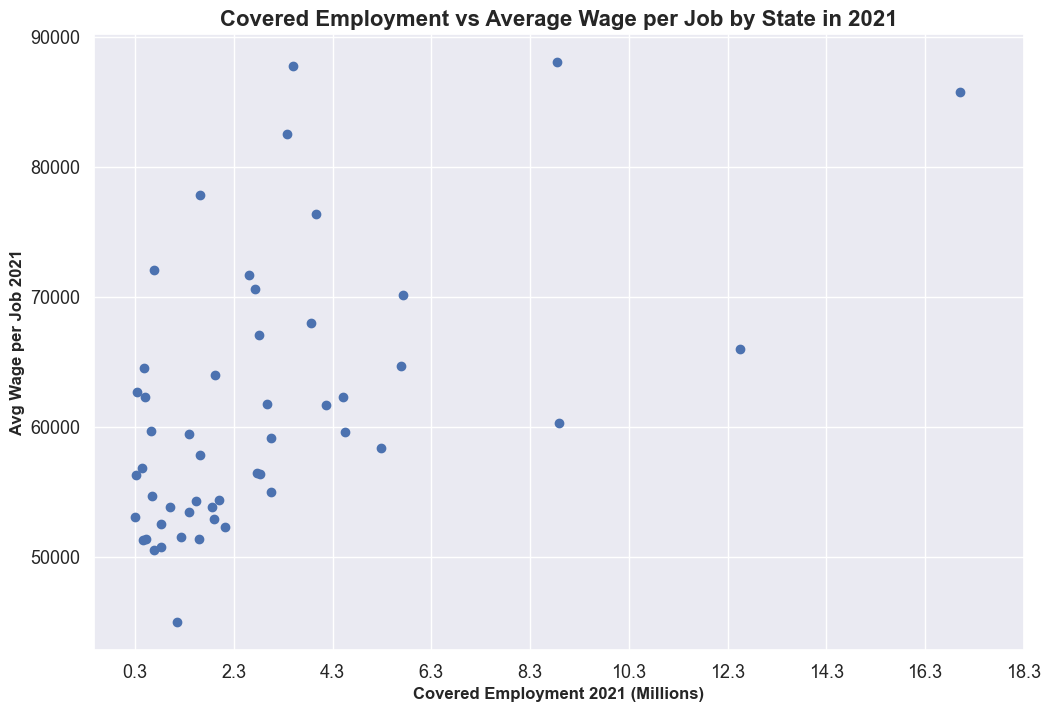

Correlation between covered employment in 2021 and average wage per job by state: 0.54


In [183]:
# 1. Correlation between covered employment in 2021 and average wage per job by state
covered_employment_vs_avg_wage = df[["Covered Employment 2021", "Avg Wage per Job 2021"]]
plt.figure(figsize=(12, 8))
plt.scatter(data=covered_employment_vs_avg_wage, x="Covered Employment 2021", y="Avg Wage per Job 2021")
# Choose the interval to space out xticks
_min = covered_employment_vs_avg_wage['Covered Employment 2021'].min()
_max = covered_employment_vs_avg_wage['Covered Employment 2021'].max()
interval = 2_000_000  # Set the desired interval (e.g., 2 million)
ticks = np.arange(_min, _max + interval, interval)
plt.xticks(ticks=ticks, labels=[f"{val/1e6:.1f}" for val in ticks], fontsize = 13)
plt.yticks(fontsize=13)
plt.title("Covered Employment vs Average Wage per Job by State in 2021", fontsize=16, fontweight="bold")
plt.xlabel("Covered Employment 2021 (Millions)", fontweight="bold")
plt.ylabel("Avg Wage per Job 2021", fontweight="bold")
plt.show()
correlation_1 = covered_employment_vs_avg_wage.corr().iloc[0, 1]
print(f"Correlation between covered employment in 2021 and average wage per job by state: {correlation_1:.2f}")

### Correlation between Covered Employment in 2021 and Average Wage per Job by State
- **Scatter Plot**: The scatter plot shows the relationship between covered employment and average wage per job for each state.
- **Correlation Value**: The correlation value is calculated to be 0.54.
- **Interpretation**: 
  - A positive correlation indicates that states with higher covered employment tend to have higher average wages.

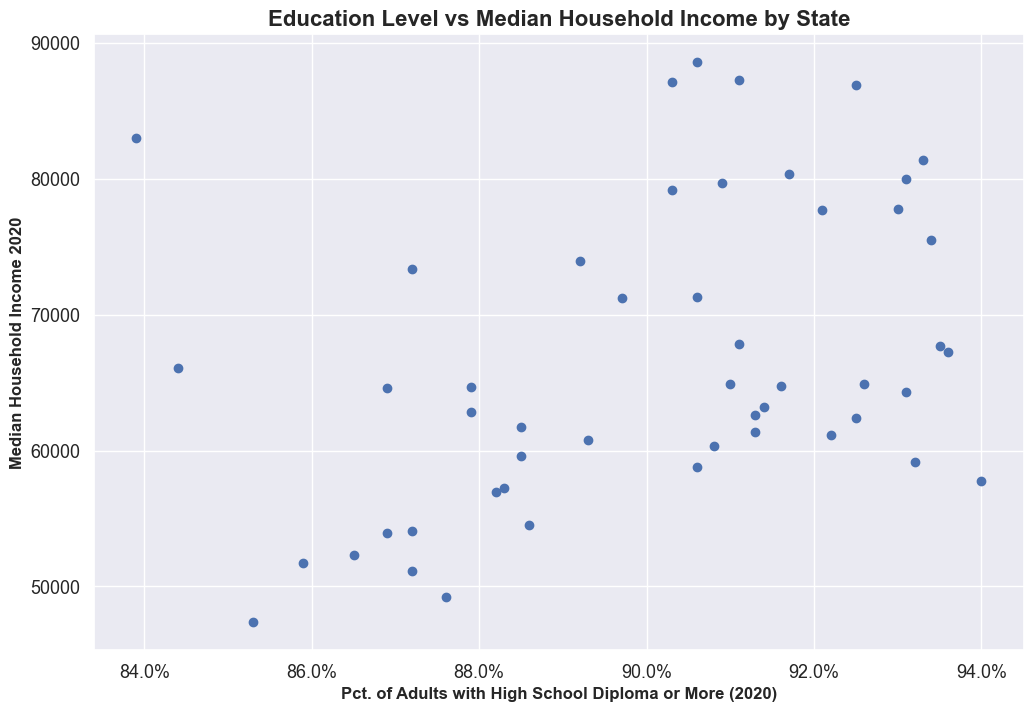

Correlation between education level and median household income by state: 0.37


In [177]:
# 2. Relationship between education level and median household income by state
education_vs_income = df[["State", "High School Diploma or More - Pct. of Adults 25+ 2020", "Median Household Income 2020"]]
plt.figure(figsize=(12, 8))
plt.scatter(data=education_vs_income, x="High School Diploma or More - Pct. of Adults 25+ 2020", y="Median Household Income 2020")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Education Level vs Median Household Income by State", fontsize=16, fontweight="bold")
plt.xlabel("Pct. of Adults with High School Diploma or More (2020)", fontweight="bold")
# Set x-axis labels as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.ylabel("Median Household Income 2020", fontweight="bold")
plt.show()
correlation_2 = education_vs_income[["High School Diploma or More - Pct. of Adults 25+ 2020", "Median Household Income 2020"]].corr().iloc[0, 1]
print(f"Correlation between education level and median household income by state: {correlation_2:.2f}")

### Relationship between Education Level and Median Household Income by State
- **Scatter Plot**: The scatter plot shows the relationship between the percentage of adults with at least a high school diploma and median household income by state.
- **Correlation Value**: The correlation value is calculated to be 0.37.
- **Interpretation**: 
  - A positive correlation indicates that states with higher education levels tend to have higher median household incomes.
  - This suggests that education is positively associated with income levels.

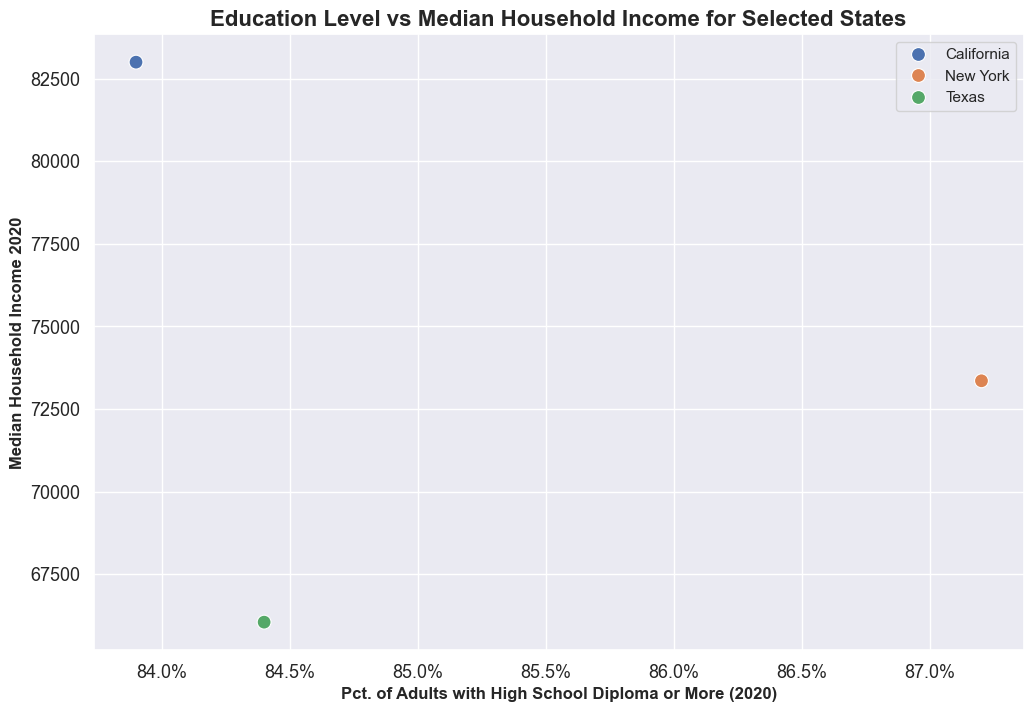

In [179]:
# 3. Compare the relationship between education level and median household income for 3 different states
states_to_compare = ["California", "Texas", "New York"]
education_vs_income_comparison = education_vs_income[education_vs_income["State"].isin(states_to_compare)]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=education_vs_income_comparison, x="High School Diploma or More - Pct. of Adults 25+ 2020", y="Median Household Income 2020", hue="State", s=100)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Education Level vs Median Household Income for Selected States", fontsize=16, fontweight="bold")
plt.xlabel("Pct. of Adults with High School Diploma or More (2020)", fontweight="bold")
# Set x-axis labels as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.ylabel("Median Household Income 2020", fontweight="bold")
plt.legend()
plt.show()

### Comparison of Education Level and Median Household Income for Selected States (California, Texas, New York)
- **Scatter Plot**: The scatter plot compares the relationship between education level and median household income for California, Texas, and New York.
- **Interpretation**: 
  - This plot helps identify any state-specific trends or deviations in the relationship between education and income.
  - It allows for a visual comparison of how education impacts income in different states.

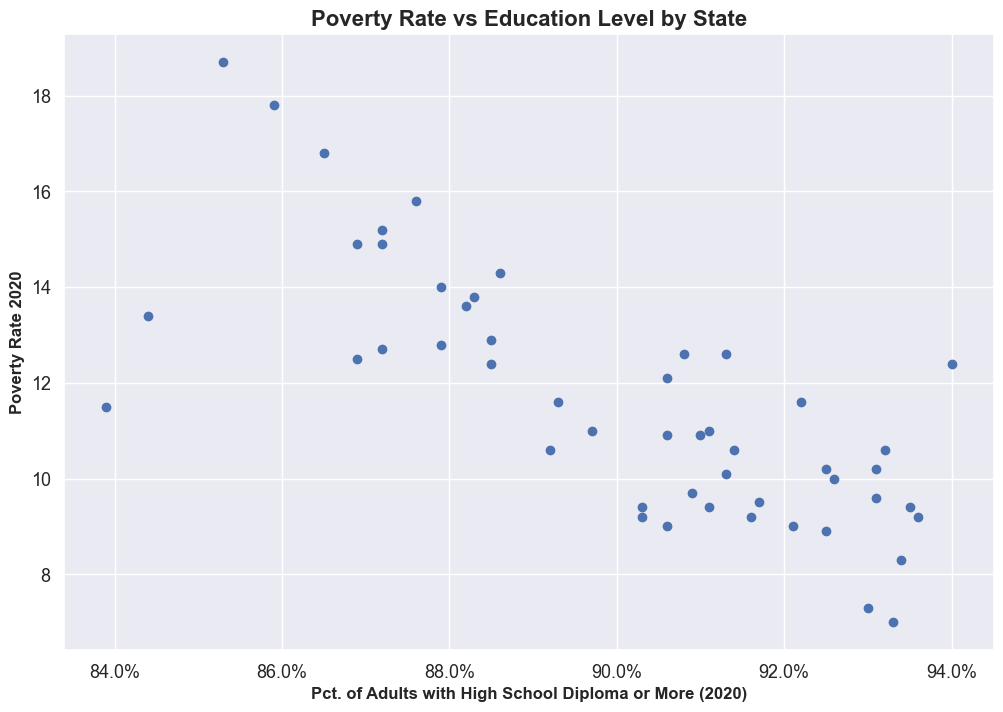

Correlation between poverty rate in 2020 and education level by state: -0.77


In [181]:
# 4. Correlation between the poverty rate in 2020 and the percentage of adults with at least a high school diploma by state
poverty_vs_education = df[["Poverty Rate 2020", "High School Diploma or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize=(12, 8))
plt.scatter(data=poverty_vs_education, x="High School Diploma or More - Pct. of Adults 25+ 2020", y="Poverty Rate 2020")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Poverty Rate vs Education Level by State", fontsize=16, fontweight="bold")
plt.xlabel("Pct. of Adults with High School Diploma or More (2020)", fontweight="bold")
# Set x-axis labels as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.ylabel("Poverty Rate 2020", fontweight="bold")
plt.show()
correlation_3 = poverty_vs_education.corr().iloc[0, 1]
print(f"Correlation between poverty rate in 2020 and education level by state: {correlation_3:.2f}")

### Correlation between the Poverty Rate in 2020 and the Percentage of Adults with at Least a High School Diploma by State
- **Scatter Plot**: The scatter plot shows the relationship between the poverty rate and the percentage of adults with at least a high school diploma by state.
- **Correlation Value**: The correlation value is calculated to be -0.77.
- **Interpretation**: 
  - A negative correlation indicates that states with higher education levels tend to have lower poverty rates.
  - This suggests that higher education may be a factor in reducing poverty.

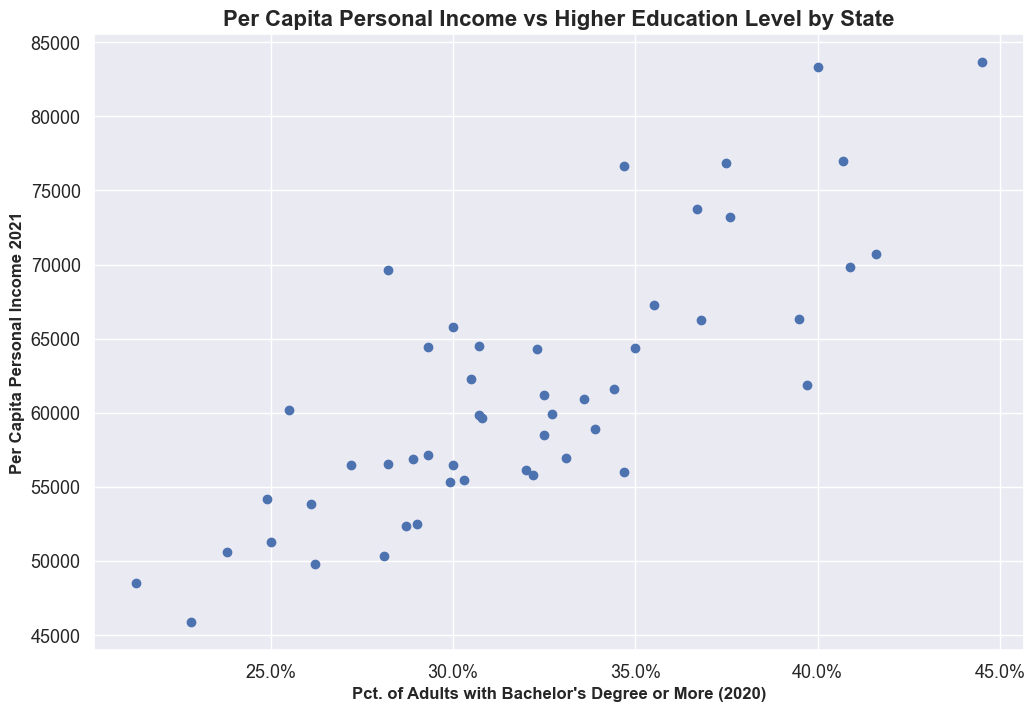

Correlation between higher education level and per capita personal income by state: 0.81


In [182]:
# 5. Relationship between per capita personal income in 2021 and the percentage of adults with a bachelor's degree or more
income_vs_bachelors = df[["Per Capita Personal Income 2021", "Bachelor's Degree or More - Pct. of Adults 25+ 2020"]]
plt.figure(figsize=(12, 8))
plt.scatter(data=income_vs_bachelors, x="Bachelor's Degree or More - Pct. of Adults 25+ 2020", y="Per Capita Personal Income 2021")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Per Capita Personal Income vs Higher Education Level by State", fontsize=16, fontweight="bold")
plt.xlabel("Pct. of Adults with Bachelor's Degree or More (2020)", fontweight="bold")
# Set x-axis labels as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
plt.ylabel("Per Capita Personal Income 2021", fontweight="bold")
plt.show()
correlation_4 = income_vs_bachelors.corr().iloc[0, 1]
print(f"Correlation between higher education level and per capita personal income by state: {correlation_4:.2f}")

### Relationship between Per Capita Personal Income in 2021 and the Percentage of Adults with a Bachelor's Degree or More
- **Scatter Plot**: The scatter plot shows the relationship between per capita personal income and the percentage of adults with a bachelor's degree or more by state.
- **Correlation Value**: The correlation value is calculated to be 0.81.
- **Interpretation**: 
  - A positive correlation indicates that states with higher levels of higher education tend to have higher per capita personal incomes.
  - This suggests that higher education is positively associated with higher income levels.


### **Hypothesis Testing**

In [ ]:
# Conduct a hypothesis testing to see if observed differences in economic indicators like median income or poverty rates across different regions are statistically significant.

# Test the hypothesis that states with a higher percentage of manufacturing jobs (compared to the national average) have a higher average wage per job in 2021.
# (Use a t-test for means comparison)

# Evaluate the hypothesis that states with above-average per capita personal income have lower poverty rates than the national average.
# (Use a chi-square test for independence)